In [1]:
from functions import utils_plot
from functions import utils_get
from functions import utils_shift
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read MOER data

In [2]:
df_moer = pd.read_csv("./moer/moer_15.csv")
df_moer.head()

,datetime,value,moer
0,2023-01-01 00:00:00+00:00,997.000000,452.638000
1,2023-01-01 00:15:00+00:00,995.000000,451.730000
2,2023-01-01 00:30:00+00:00,995.333333,451.881333
3,2023-01-01 00:45:00+00:00,995.333333,451.881333
4,2023-01-01 01:00:00+00:00,987.000000,448.098000


In [3]:
df_moer['datetime'] = pd.to_datetime(df_moer['datetime'])
df_moer['datetime'] = df_moer['datetime'].dt.tz_convert('America/Los_Angeles')

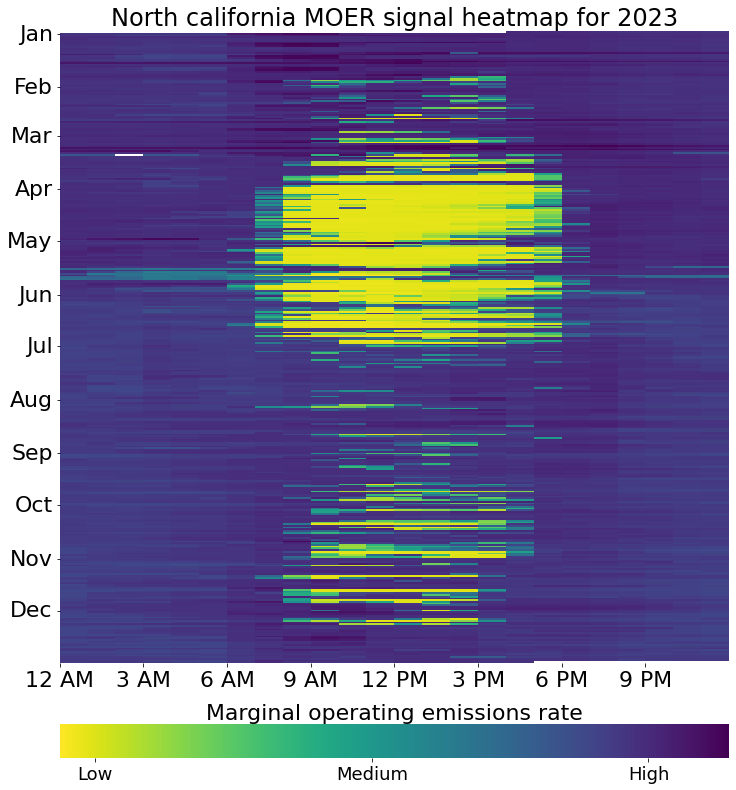

In [4]:
utils_plot.plot_hourly_heatmap(df=df_moer, 
                               columns=['moer'], 
                               annotation="Marginal operating emissions rate", 
                               plot_title='North california MOER signal heatmap for 2023', 
                               cbar_ticks=[50, 250, 450], 
                               cbar_label=['Low', 'Medium', 'High'], 
                               figsize=(12, 15))

Read power data

In [5]:
data_df = pd.read_csv("./sw/sw.csv")
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df['datetime'] = data_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_power = utils_get.get_power(df=data_df, unit="W")
df_power.head()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499


Read climate data

In [6]:
df_climate = pd.read_csv("./climate/climate.csv")
df_climate['datetime'] = pd.to_datetime(df_climate['datetime'])
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
1,2023-01-01 00:15:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
2,2023-01-01 00:30:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
3,2023-01-01 00:45:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
4,2023-01-01 01:00:00-08:00,10.0,0.0,0.0,9.4,86.289932,7.2,1.5,37.978,-122.0311,America/Los_Angeles


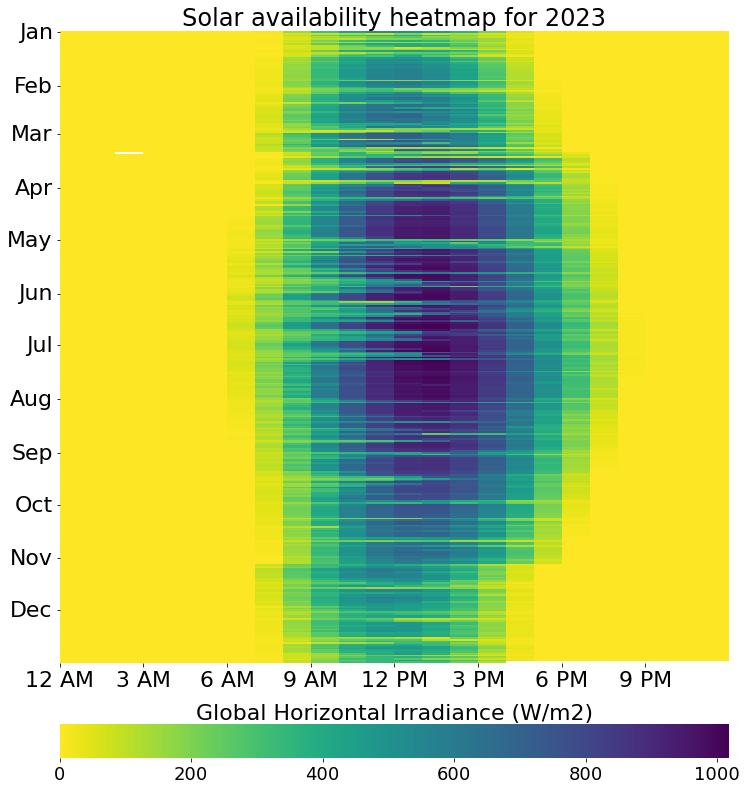

In [7]:
utils_plot.plot_hourly_heatmap(df=df_climate, 
                               columns=['ghi'], 
                               annotation="Global Horizontal Irradiance (W/m2)", 
                               plot_title='Solar availability heatmap for 2023',
                               figsize=(12, 15))

Grid demand and supply information from California ISO

In [8]:
grid_demand = utils_get.get_grid_demand('./grid/demand/*.csv')
grid_solar = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Solar')
grid_wind = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Wind')
grid_renew = pd.merge(grid_solar, grid_wind, on='datetime', how='outer')
grid_renew['renew'] = grid_renew['Solar'] + grid_renew['Wind']
df_grid = pd.merge(grid_renew, grid_demand, on='datetime', how='outer')
df_grid.set_index('datetime', inplace=True)
df_grid = df_grid.resample('15T').ffill()
df_grid.reset_index(inplace=True)
df_grid['renew'] = df_grid['renew'].clip(lower=0)
df_grid.head()

,datetime,Solar,Wind,renew,demand
0,2023-01-01 00:00:00-08:00,NaN,NaN,NaN,21193.0
1,2023-01-01 00:15:00-08:00,NaN,NaN,NaN,21193.0
2,2023-01-01 00:30:00-08:00,NaN,NaN,NaN,21193.0
3,2023-01-01 00:45:00-08:00,NaN,NaN,NaN,21193.0
4,2023-01-01 01:00:00-08:00,NaN,NaN,NaN,20695.0


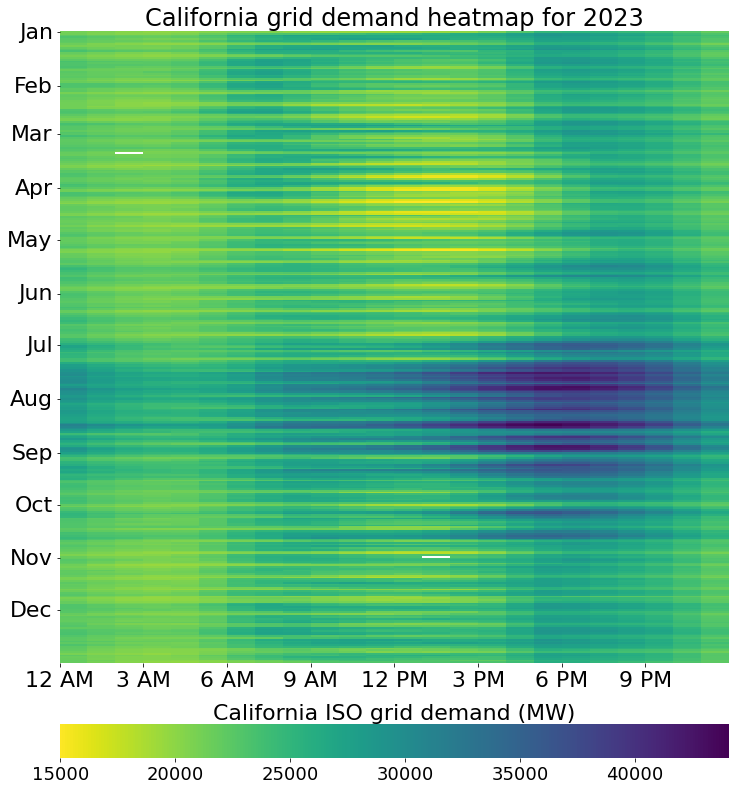

In [9]:
utils_plot.plot_hourly_heatmap(df=df_grid, 
                               columns=['demand'], 
                               annotation='California ISO grid demand (MW)', 
                               plot_title='California grid demand heatmap for 2023',
                               figsize=(12, 15))

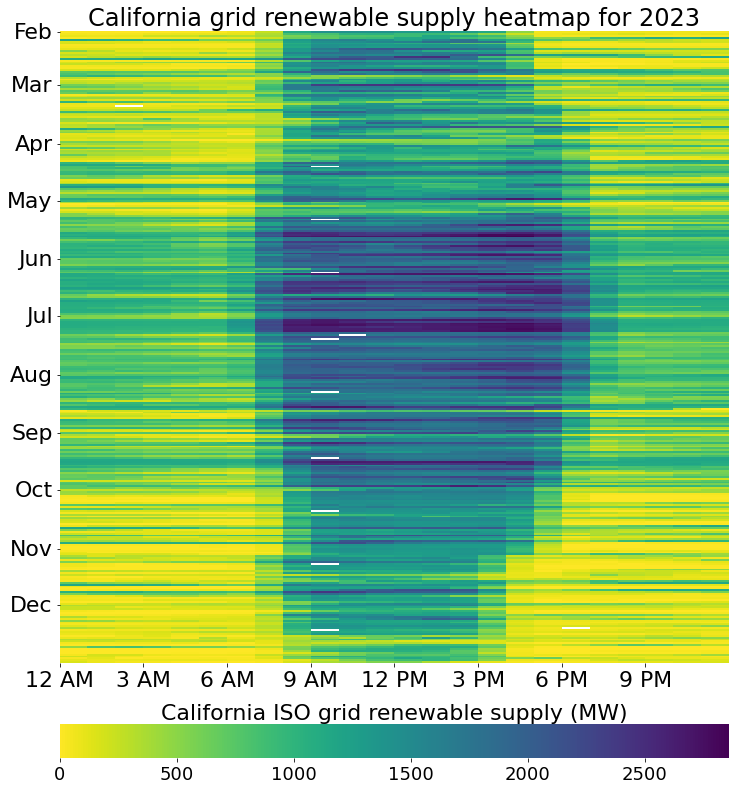

In [10]:
utils_plot.plot_hourly_heatmap(df=df_grid, 
                               columns=['renew'], 
                               annotation='California ISO grid renewable supply (MW)', 
                               plot_title='California grid renewable supply heatmap for 2023',
                               figsize=(12, 15))

## Task 1: Examing HVAC related carbon emissions at Main station level

In [11]:
hvac_all = df_power['SDH.SW.MSA.MAIN.PWR REAL 3 P'] - df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_all})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,385.999
1,2023-01-20 16:00:00-08:00,386.999
2,2023-01-20 16:15:00-08:00,387.999
3,2023-01-20 16:30:00-08:00,402.999
4,2023-01-20 16:45:00-08:00,377.499


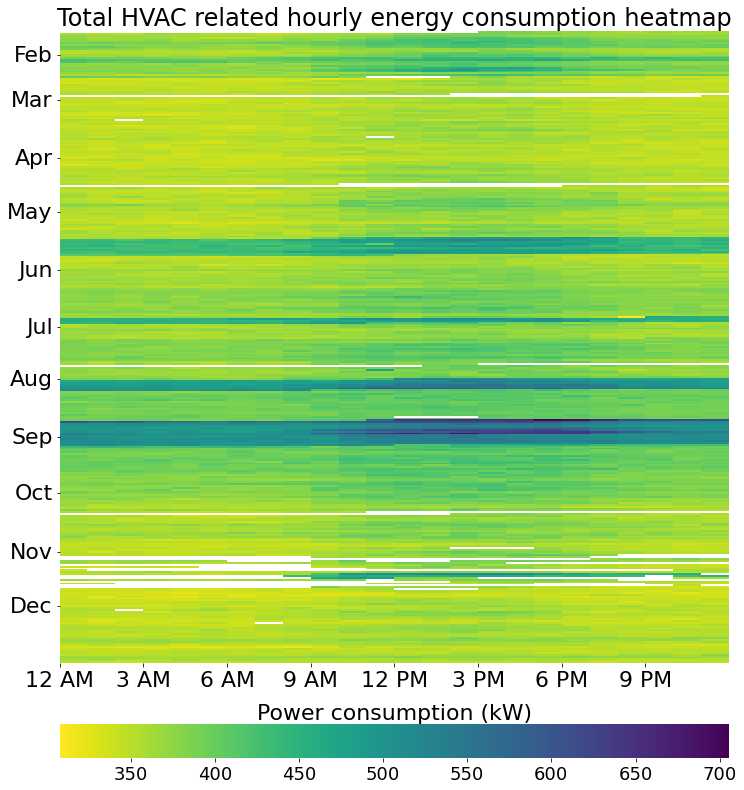

In [12]:
utils_plot.plot_hourly_heatmap(df=df_HVAC, 
                               columns=columns, 
                               annotation='Power consumption (kW)', 
                               plot_title='Total HVAC related hourly energy consumption heatmap',
                               figsize=(12, 15))

Get emissions data

In [13]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,182.954262
1,2023-01-20 16:00:00-08:00,177.044561
2,2023-01-20 16:15:00-08:00,176.210263
3,2023-01-20 16:30:00-08:00,182.595623
4,2023-01-20 16:45:00-08:00,171.098905


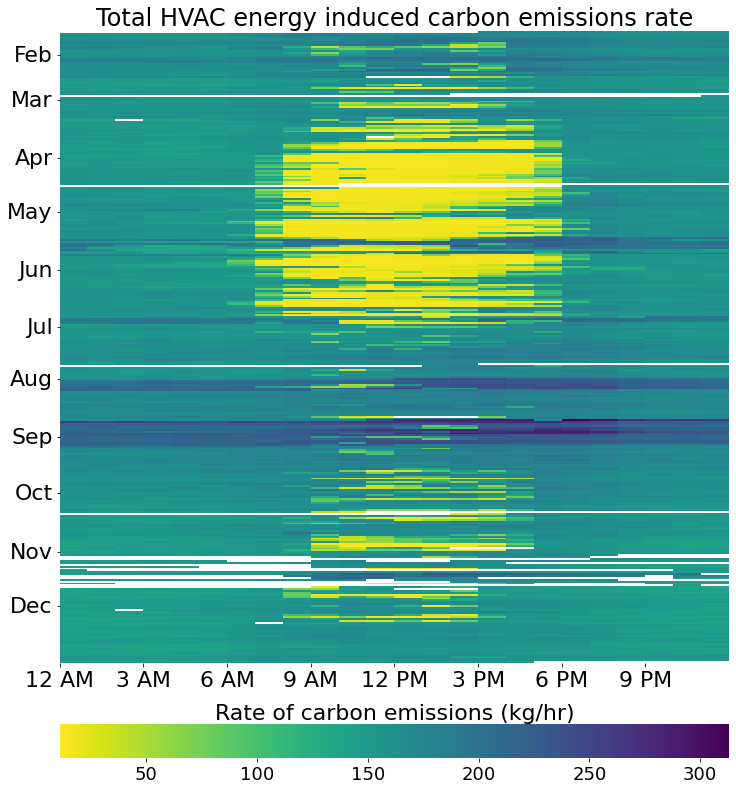

In [14]:
utils_plot.plot_hourly_heatmap(df=df_emissions, 
                               columns=columns, 
                               annotation='Rate of carbon emissions (kg/hr)', 
                               plot_title='Total HVAC energy induced carbon emissions rate',
                               figsize=(12, 15))

Get overall dataframe

In [15]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], pd.merge(df_climate, df_grid, on='datetime', how='inner'), on = 'datetime', how = 'outer')
df_all.head()

,datetime,HVAC,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone,Solar,Wind,renew,demand
0,2023-01-20 15:45:00-08:00,182.954262,13.0,680.0,207.0,12.2,38.307616,-1.7,3.6,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,23332.0
1,2023-01-20 16:00:00-08:00,177.044561,13.0,622.0,164.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
2,2023-01-20 16:15:00-08:00,176.210263,12.0,545.0,121.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
3,2023-01-20 16:30:00-08:00,182.595623,12.0,445.0,79.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
4,2023-01-20 16:45:00-08:00,171.098905,12.0,225.0,40.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0


hourly average and occupied hours 

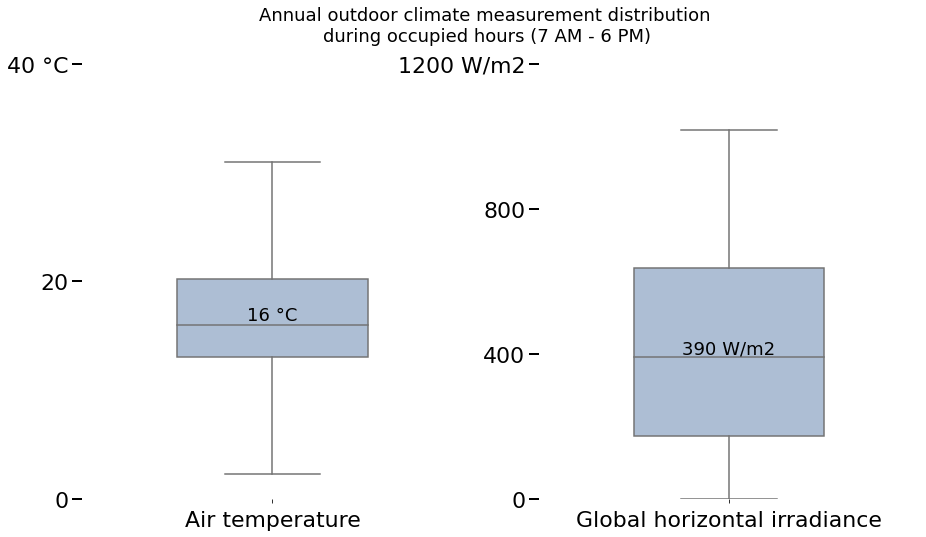

In [16]:
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
utils_plot.create_box_plot(df_hourly_occ, ['air_temp'], ' °C', axe=axs[0], yrange=[0, 40, 20], hide_xticks=True, xlabel='Air temperature')
utils_plot.create_box_plot(df_hourly_occ, ['ghi'], ' W/m2', axe=axs[1], yrange=[0, 1200, 400], hide_xticks=True, xlabel='Global horizontal irradiance')
fig.suptitle('Annual outdoor climate measurement distribution \nduring occupied hours (7 AM - 6 PM)', fontsize=18)
plt.show()

Time window comparison: Mar - Jun and Jul - Sep

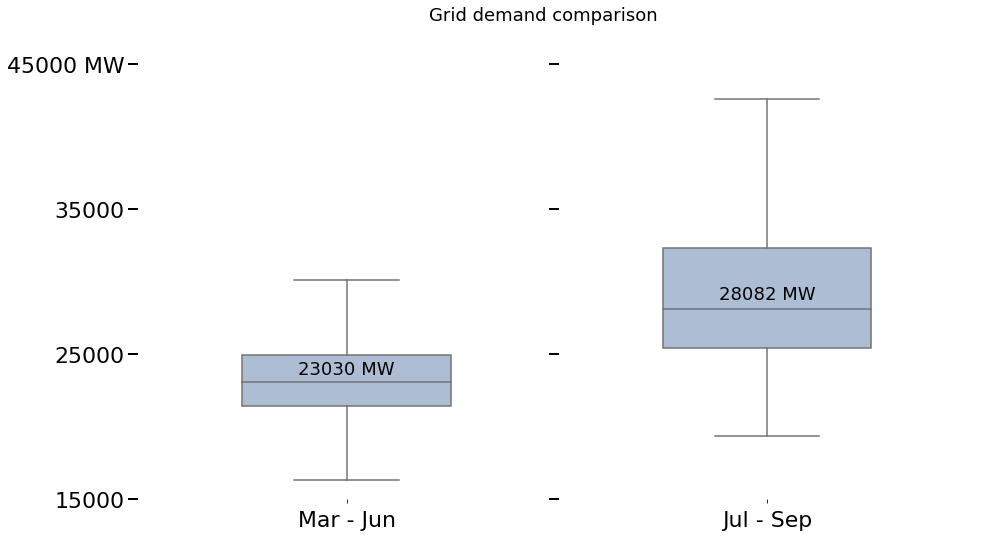

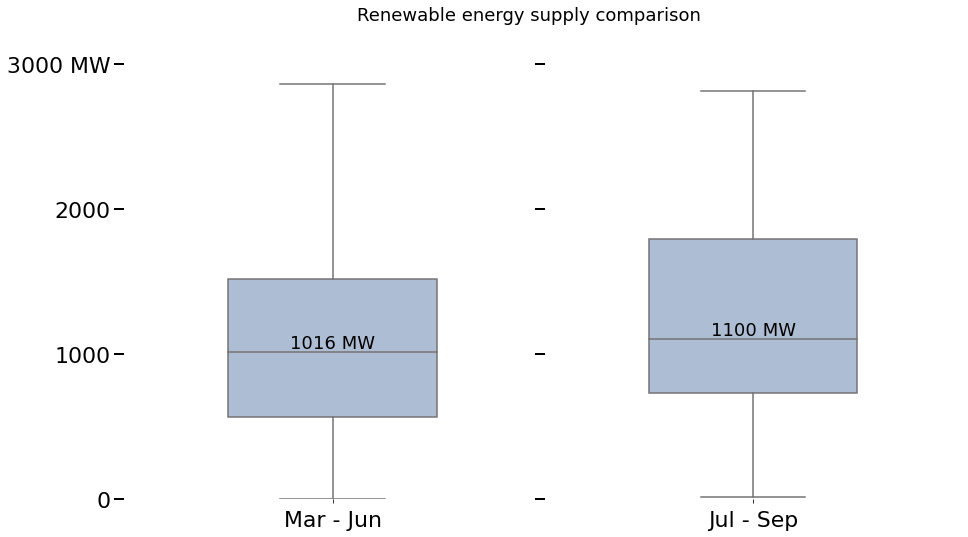

In [17]:
df_MJ = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 'ghi', 'rh_out', 'demand', 'renew']]

df_JS = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 'ghi', 'rh_out', 'demand', 'renew']]

fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
utils_plot.create_box_plot(df_MJ, ['demand'], ' MW', axs[0], yrange=[15000, 45000, 10000], hide_xticks=True, xlabel='Mar - Jun')
utils_plot.create_box_plot(df_JS, ['demand'], ' MW', axs[1], yrange=[15000, 45000, 10000], hide_xticks=True, xlabel='Jul - Sep')
fig.suptitle('Grid demand comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
utils_plot.create_box_plot(df_MJ, ['renew'], ' MW', axs[0], yrange=[0, 3000, 1000], hide_xticks=True, xlabel='Mar - Jun')
utils_plot.create_box_plot(df_JS, ['renew'], ' MW', axs[1], yrange=[0, 3000, 1000], hide_xticks=True, xlabel='Jul - Sep')
fig.suptitle('Renewable energy supply comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()


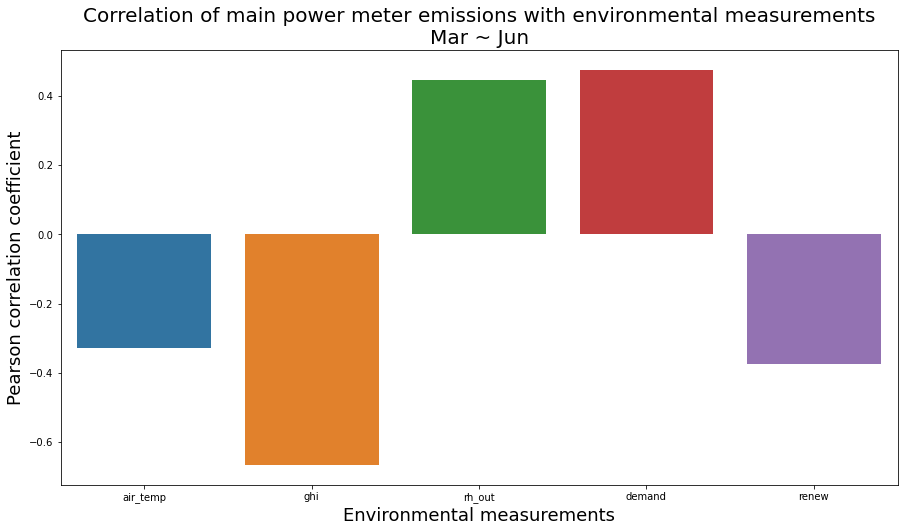

In [18]:
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements\nMar ~ Jun', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

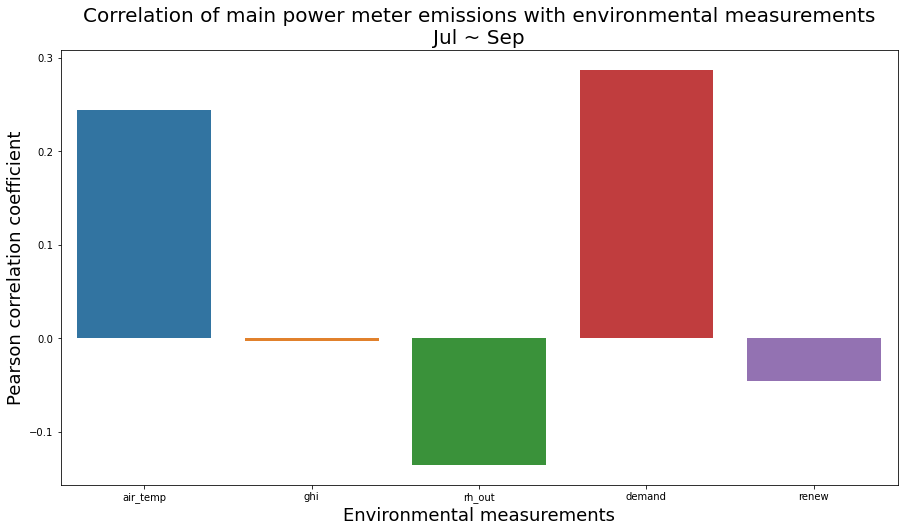

In [19]:
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements\nJul ~ Sep', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Load shift potential and hourly carbon emissions breakdown by time windows

Text(0.5, 0.98, 'Total HVAC operation induced carbon emissions hourly rate distribution')

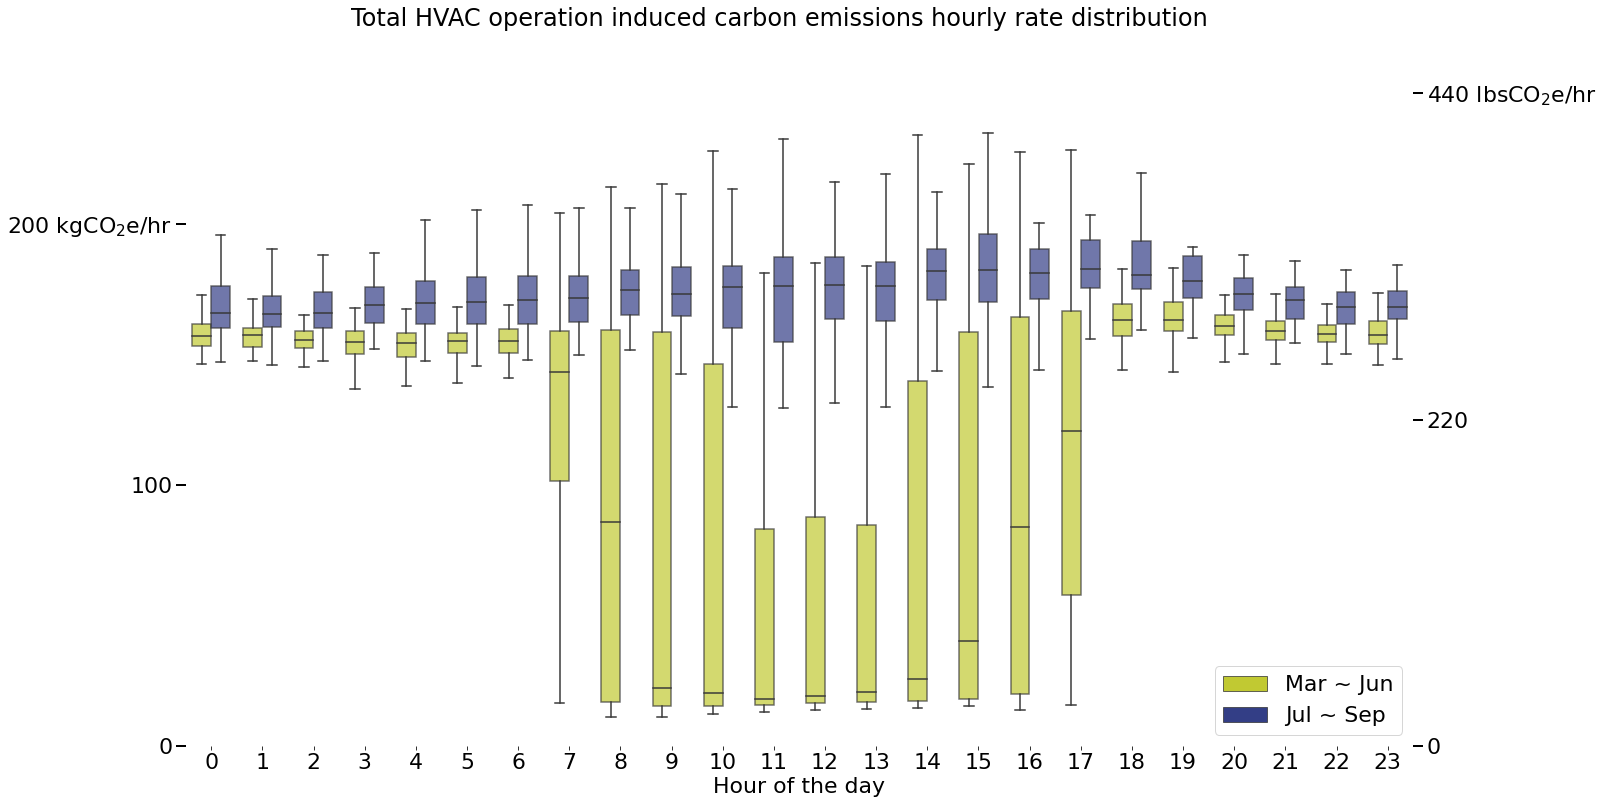

In [20]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
df_hourly_emissions.reset_index(inplace=True)

# Time window: March ~ June; July ~ September
df_hourly_emissions['Month'] = 1
for i in range(len(df_hourly_emissions)):
    if (df_hourly_emissions['datetime'].dt.month[i] >= 7) & (df_hourly_emissions['datetime'].dt.month[i] <= 9):
        df_hourly_emissions.loc[i, 'Month'] = 'Jul ~ Sep'
    else:
        df_hourly_emissions.loc[i, 'Month'] = 'Mar ~ Jun'

# Ensure Datetime is the index
df_hourly_emissions['hour'] = df_hourly_emissions['datetime'].dt.hour
df_hourly_emissions['lbs/hr'] = df_hourly_emissions[columns] * 2.20462

fig, ax = plt.subplots(figsize=(22, 12))
utils_plot.create_box_plot(df=df_hourly_emissions, 
                           columns=columns, 
                           unit=' kgCO$_2$e/hr', 
                           axe=ax, 
                           annotation=False, 
                           hide_xticks=False, 
                           xlabel='Hour of the day', 
                           yrange=[0, 250, 100], 
                           type='Month', 
                           dual_columns=['lbs/hr'], 
                           dual_unit=' lbsCO$_2$e/hr', 
                           conversion_factor=2.20462)

fig.suptitle('Total HVAC operation induced carbon emissions hourly rate distribution', fontsize=24)

## Task 2: Examing HVAC related carbon emissions for Nano fab

In [21]:
hvac_nano = df_power['SDH.SW.MSA.MS41B.PWR REAL 3 P'] + df_power['SDH.SW.MSA.ATS-E1.PWR REAL 3 P'] + df_power['SDH.SW.MSA.CD41A.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_nano})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,89.998
1,2023-01-20 16:00:00-08:00,91.998
2,2023-01-20 16:15:00-08:00,95.998
3,2023-01-20 16:30:00-08:00,87.998
4,2023-01-20 16:45:00-08:00,90.998


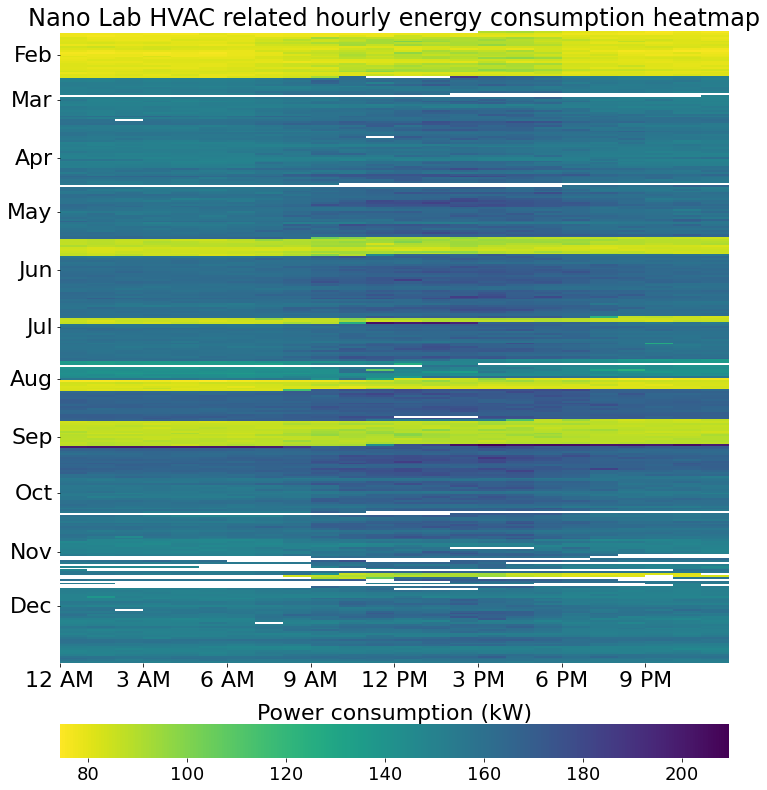

In [22]:
utils_plot.plot_hourly_heatmap(df=df_HVAC, 
                               columns=columns, 
                               annotation='Power consumption (kW)', 
                               plot_title='Nano Lab HVAC related hourly energy consumption heatmap',
                               figsize=(12, 15))

In [23]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,42.656892
1,2023-01-20 16:00:00-08:00,42.087306
2,2023-01-20 16:15:00-08:00,43.597620
3,2023-01-20 16:30:00-08:00,39.871190
4,2023-01-20 16:45:00-08:00,41.244237


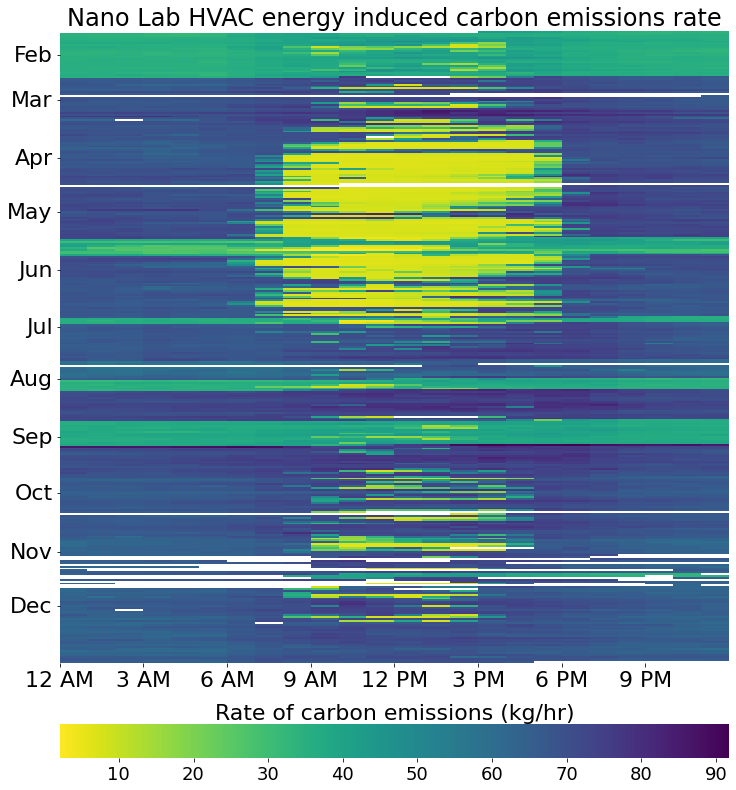

In [24]:
utils_plot.plot_hourly_heatmap(df=df_emissions, 
                               columns=columns, 
                               annotation='Rate of carbon emissions (kg/hr)', 
                               plot_title='Nano Lab HVAC energy induced carbon emissions rate',
                               figsize=(12, 15))

Get overall dataframe

In [25]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)


Load shift potential and hourly carbon emissions breakdown by time windows

Text(0.5, 0.98, 'Nano Lab HVAC operation induced carbon emissions hourly rate distribution')

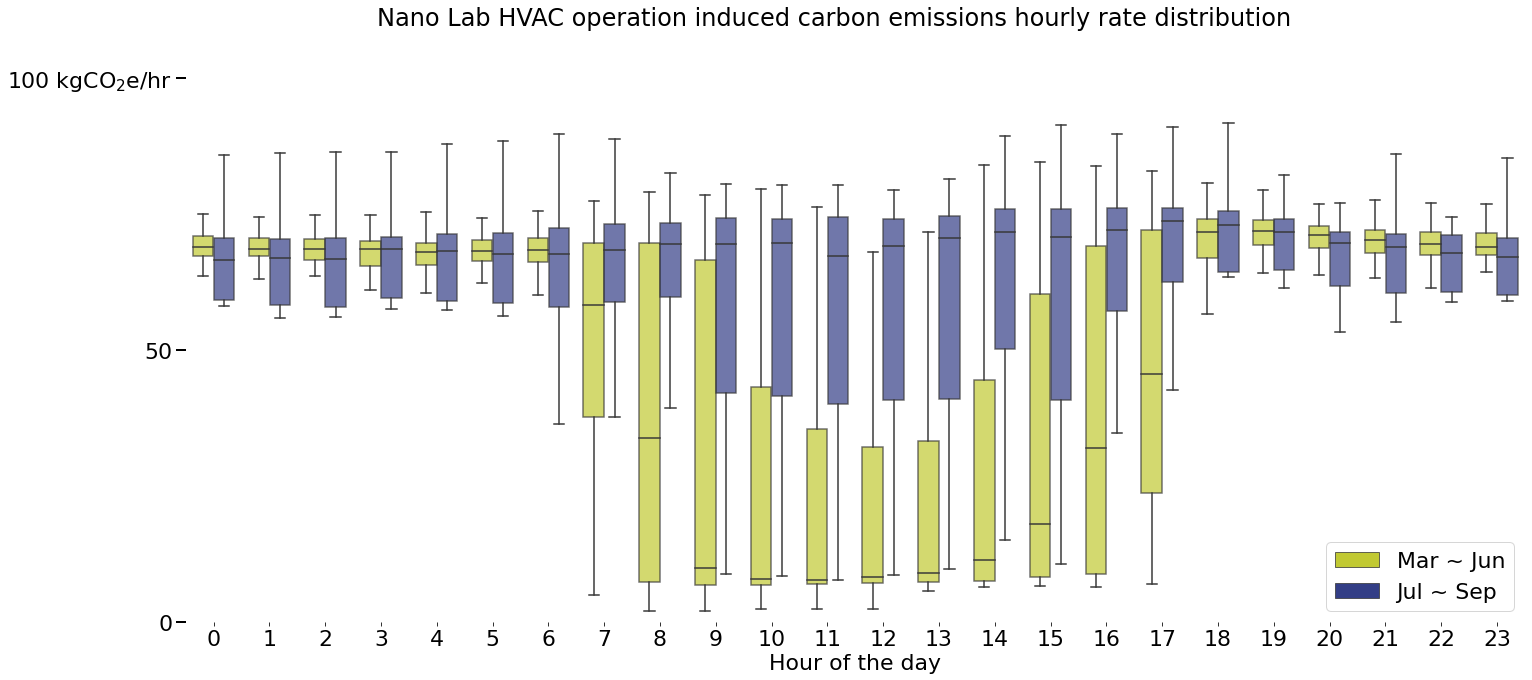

In [26]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
df_hourly_emissions.reset_index(inplace=True)

# Time window: March ~ June; July ~ September
df_hourly_emissions['Month'] = 1
for i in range(len(df_hourly_emissions)):
    if (df_hourly_emissions['datetime'].dt.month[i] >= 7) & (df_hourly_emissions['datetime'].dt.month[i] <= 9):
        df_hourly_emissions.loc[i, 'Month'] = 'Jul ~ Sep'
    else:
        df_hourly_emissions.loc[i, 'Month'] = 'Mar ~ Jun'

# Ensure Datetime is the index
df_hourly_emissions['hour'] = df_hourly_emissions['datetime'].dt.hour

fig, ax = plt.subplots(figsize=(24, 10))
utils_plot.create_box_plot(df=df_hourly_emissions, 
                           columns=columns, 
                           unit=' kgCO$_2$e/hr', 
                           axe=ax, 
                           annotation=False, 
                           hide_xticks=False, 
                           xlabel='Hour of the day', 
                           yrange=[0, 100, 50], 
                           type='Month')
fig.suptitle('Nano Lab HVAC operation induced carbon emissions hourly rate distribution', fontsize=24)

## Task 3: Examing HVAC related carbon emissions for office space

In [27]:
hvac_office = df_power['SDH.SW.MSA.CD4RA.PWR REAL 3 P'] + df_power['SDH.SW.MSA.CD41A.PWR REAL 3 P'] + df_power['SDH.SW.MSA.ATS-E1.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_office})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,114.997
1,2023-01-20 16:00:00-08:00,118.997
2,2023-01-20 16:15:00-08:00,120.997
3,2023-01-20 16:30:00-08:00,111.997
4,2023-01-20 16:45:00-08:00,114.997


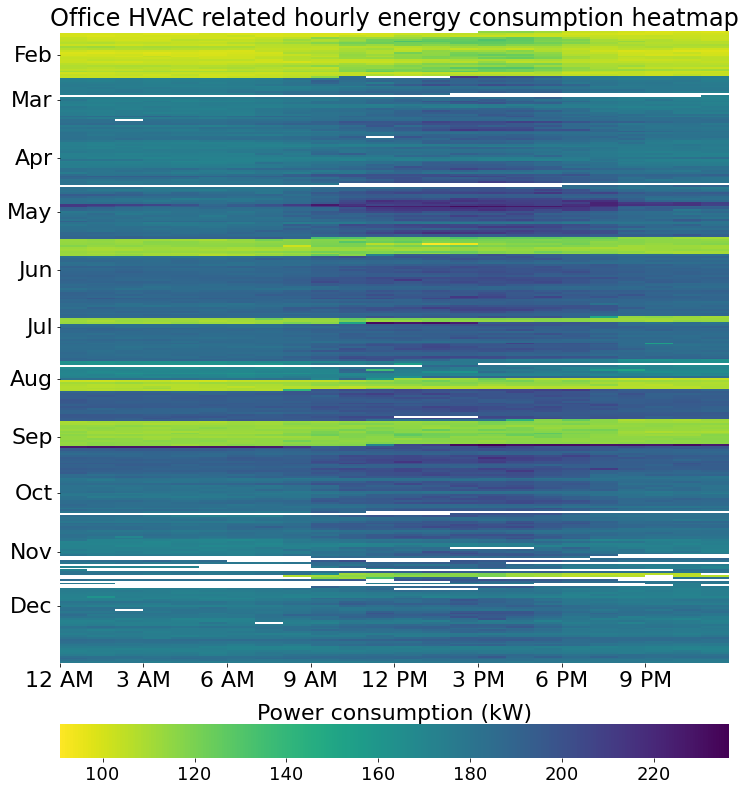

In [28]:
utils_plot.plot_hourly_heatmap(df=df_HVAC, 
                               columns=columns, 
                               annotation='Power consumption (kW)', 
                               plot_title='Office HVAC related hourly energy consumption heatmap',
                               figsize=(12, 15))

In [29]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,54.505818
1,2023-01-20 16:00:00-08:00,54.438827
2,2023-01-20 16:15:00-08:00,54.950949
3,2023-01-20 16:30:00-08:00,50.744945
4,2023-01-20 16:45:00-08:00,52.121624


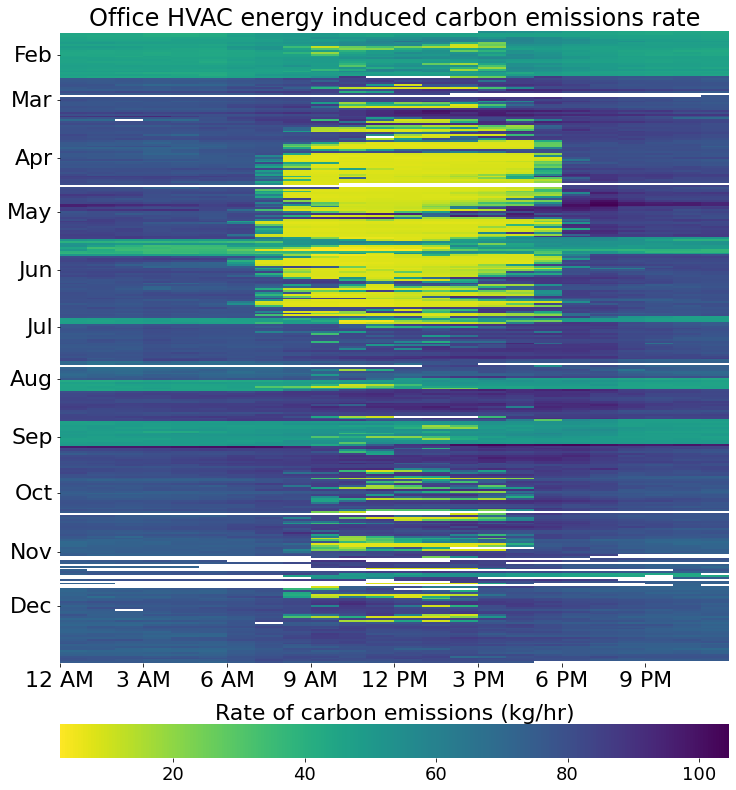

In [30]:
utils_plot.plot_hourly_heatmap(df=df_emissions, 
                               columns=columns, 
                               annotation='Rate of carbon emissions (kg/hr)', 
                               plot_title='Office HVAC energy induced carbon emissions rate', 
                               figsize=(12, 15))

Get overall dataframe

In [31]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

Load shift potential and hourly carbon emissions breakdown by time windows

Text(0.5, 0.98, 'Office HVAC operation induced carbon emissions hourly rate distribution')

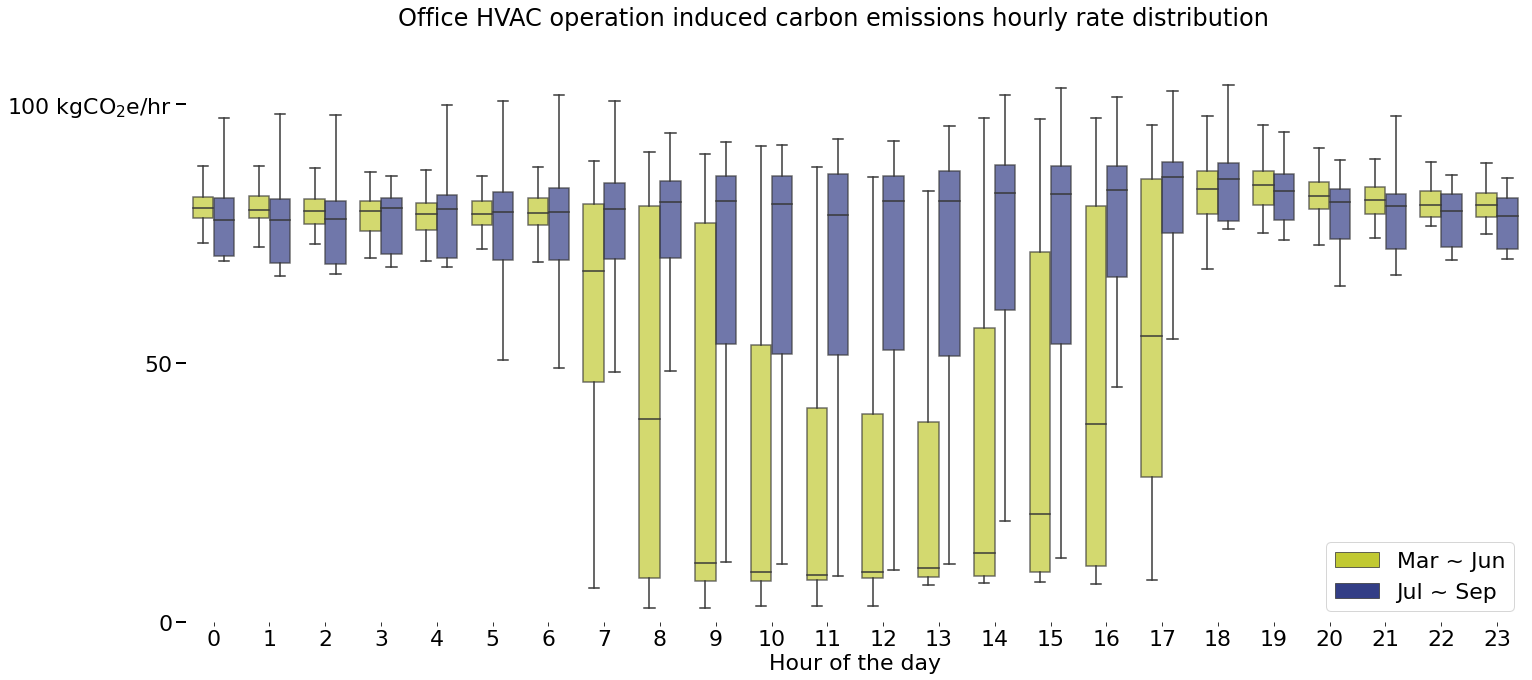

In [32]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
df_hourly_emissions.reset_index(inplace=True)

# Time window: March ~ June; July ~ September
df_hourly_emissions['Month'] = 1
for i in range(len(df_hourly_emissions)):
    if (df_hourly_emissions['datetime'].dt.month[i] >= 7) & (df_hourly_emissions['datetime'].dt.month[i] <= 9):
        df_hourly_emissions.loc[i, 'Month'] = 'Jul ~ Sep'
    else:
        df_hourly_emissions.loc[i, 'Month'] = 'Mar ~ Jun'

# Ensure Datetime is the index
df_hourly_emissions['hour'] = df_hourly_emissions['datetime'].dt.hour

fig, ax = plt.subplots(figsize=(24, 10))
utils_plot.create_box_plot(df=df_hourly_emissions, 
                           columns=columns, 
                           unit=' kgCO$_2$e/hr', 
                           axe=ax, 
                           annotation=False, 
                           hide_xticks=False, 
                           xlabel='Hour of the day', 
                           yrange=[0, 105, 50], 
                           type='Month')
fig.suptitle('Office HVAC operation induced carbon emissions hourly rate distribution', fontsize=24)

## Task 3: Examing carbon emissions for lighting and plug-load

In [33]:
ltg_pl = df_power['SDH.SW.MSB.CB4A.PWR REAL 3 P']
df_ltg_pl = pd.DataFrame({'datetime': df_power['datetime'], 'ltg_pl': ltg_pl})
columns = ['ltg_pl']
df_ltg_pl.head()

,datetime,ltg_pl
0,2023-01-20 15:45:00-08:00,55.999
1,2023-01-20 16:00:00-08:00,55.999
2,2023-01-20 16:15:00-08:00,57.999
3,2023-01-20 16:30:00-08:00,55.999
4,2023-01-20 16:45:00-08:00,54.999


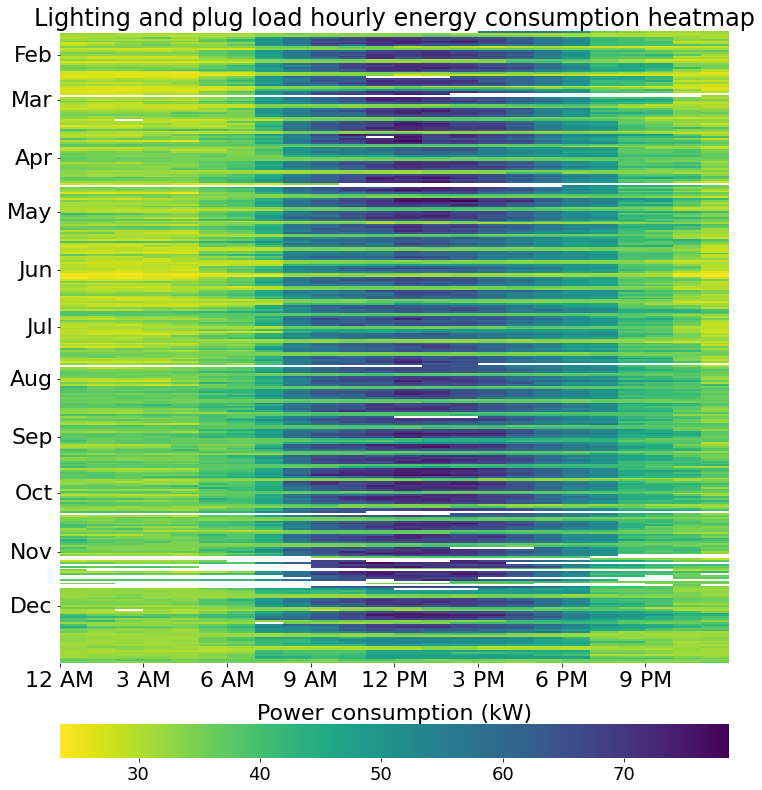

In [34]:
utils_plot.plot_hourly_heatmap(df=df_ltg_pl, 
                               columns=columns, 
                               annotation='Power consumption (kW)', 
                               plot_title='Lighting and plug load hourly energy consumption heatmap',
                               figsize=(12, 15))

In [35]:
df_temp = pd.merge(df_ltg_pl, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,ltg_pl
0,2023-01-20 15:45:00-08:00,26.542182
1,2023-01-20 16:00:00-08:00,25.618460
2,2023-01-20 16:15:00-08:00,26.340323
3,2023-01-20 16:30:00-08:00,25.372699
4,2023-01-20 16:45:00-08:00,24.927930


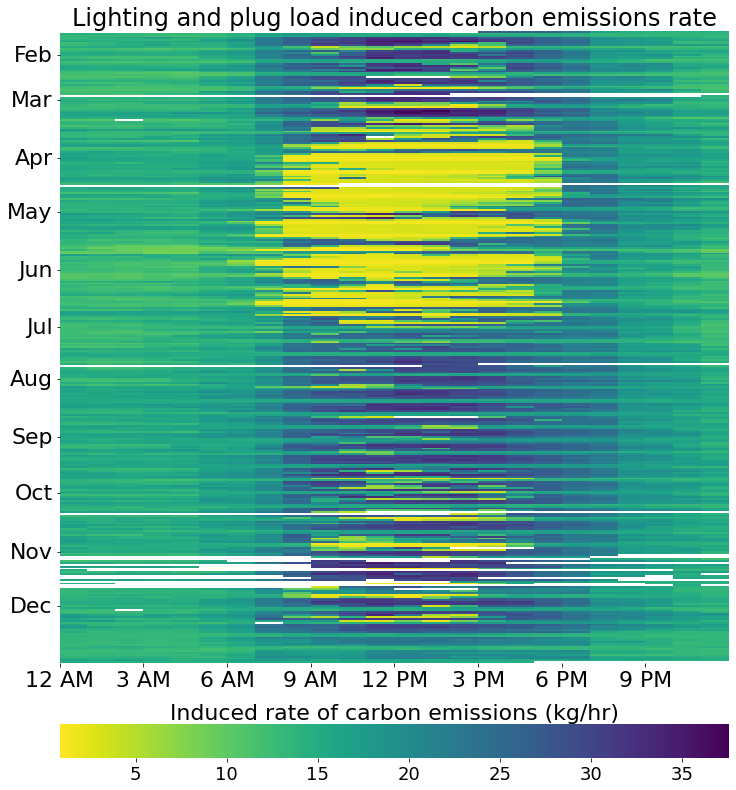

In [36]:
utils_plot.plot_hourly_heatmap(df=df_emissions, 
                               columns=columns, 
                               annotation='Induced rate of carbon emissions (kg/hr)', 
                               plot_title='Lighting and plug load induced carbon emissions rate', 
                               figsize=(12, 15))

Get overall dataframe

In [37]:
df_all = pd.merge(df_emissions[['datetime', 'ltg_pl']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

Load shift potential and hourly carbon emissions breakdown by time windows

Text(0.5, 0.98, 'Lighting and plug load induced carbon emissions hourly rate distribution')

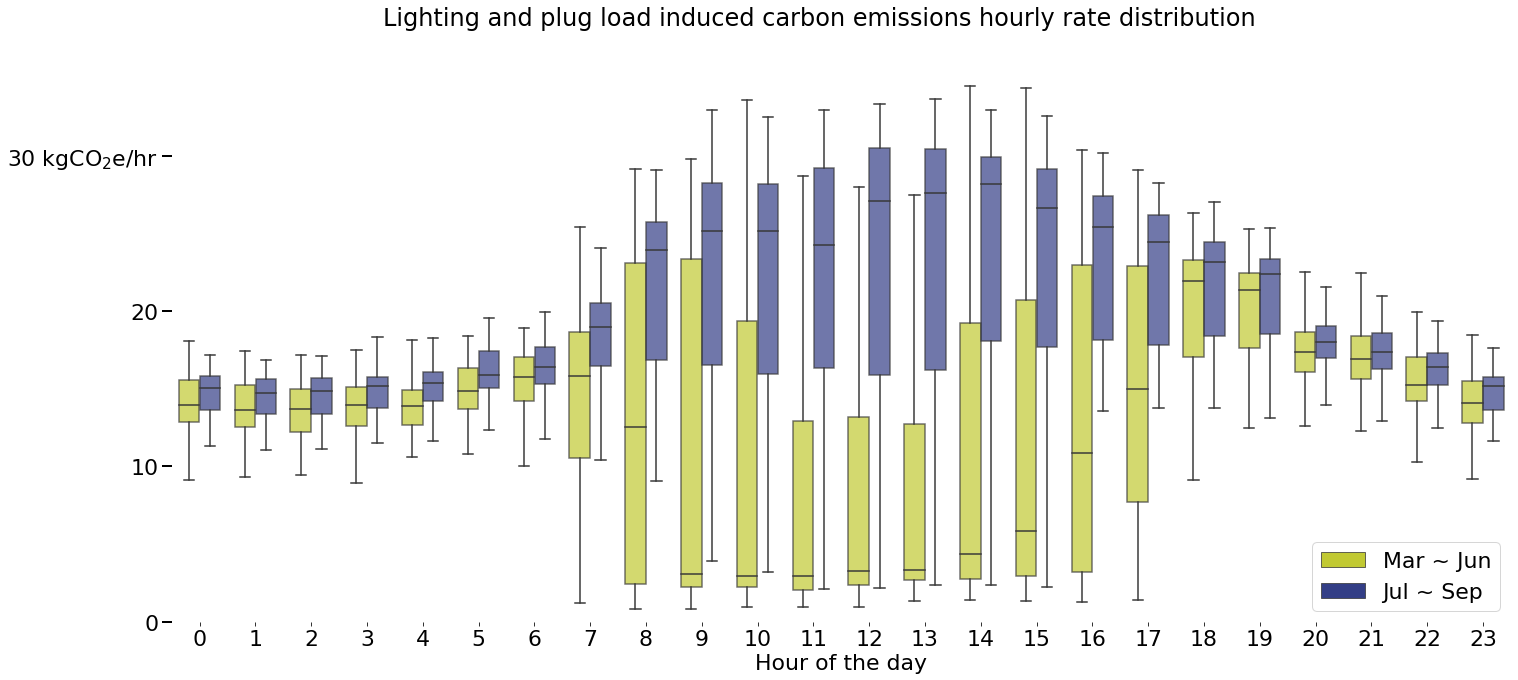

In [38]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
df_hourly_emissions.reset_index(inplace=True)

# Time window: March ~ June; July ~ September
df_hourly_emissions['Month'] = 1
for i in range(len(df_hourly_emissions)):
    if (df_hourly_emissions['datetime'].dt.month[i] >= 7) & (df_hourly_emissions['datetime'].dt.month[i] <= 9):
        df_hourly_emissions.loc[i, 'Month'] = 'Jul ~ Sep'
    else:
        df_hourly_emissions.loc[i, 'Month'] = 'Mar ~ Jun'

# Ensure Datetime is the index
df_hourly_emissions['hour'] = df_hourly_emissions['datetime'].dt.hour

fig, ax = plt.subplots(figsize=(24, 10))
utils_plot.create_box_plot(df=df_hourly_emissions, 
                           columns=columns, 
                           unit=' kgCO$_2$e/hr', 
                           axe=ax, 
                           annotation=False, 
                           plot_title="", 
                           hide_xticks=False, 
                           xlabel='Hour of the day', 
                           yrange=[0, 35, 10], 
                           type='Month')
fig.suptitle('Lighting and plug load induced carbon emissions hourly rate distribution', fontsize=24)

## Task 4: Calculate load shift potential for chiller (Assume chiller setpoint reset)

In [39]:
# Define the conversion function
def f2c(df, column_name):

    # Convert the column from °F to °C
    df[column_name] = (df[column_name] - 32) * 5/9
    return df

Calculate chiller efficiency kW/ton

In [40]:
# Define the function to calculate wet-bulb temperature
def calculate_wetbulb(df):
    # Constants for the approximation formula
    c1, c2, c3, c4, c5, c6, c7 = 0.151977, 8.313659, 1.676331, 0.00391838, 0.023101, 4.686035, 0.00000022
    
    # Extracting dry-bulb temperature (Tdb) and relative humidity (RH) from the dataframe
    Tdb = df['t_out']
    RH = df['rh_out']
    
    # Convert RH from percentage to fraction
    RH_frac = RH / 100.0
    
    # Calculate wet-bulb temperature using the approximation formula
    Twb = Tdb * np.arctan(c1 * (RH_frac + c2)**0.5) + \
          np.arctan(Tdb + RH_frac) - np.arctan(RH_frac - c3) + \
          c4 * (RH_frac)**1.5 * np.arctan(c5 * RH_frac) - c6 + \
          c7 * Tdb * RH_frac**2  # This term is typically very small and can be ignored for most practical purposes
    
    df['wb_temp'] = Twb
    return df


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/70759576.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']


Avg eff (kW/ton): 0.5840341262816083
Root mean Squared Error: 0.11382184073937071
Intercept: 0.7872733029253314
Slope: [-0.01982475 -0.00187467 -0.00147391]
RMSE for power consumption: 13.652243373736052


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/70759576.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_power']


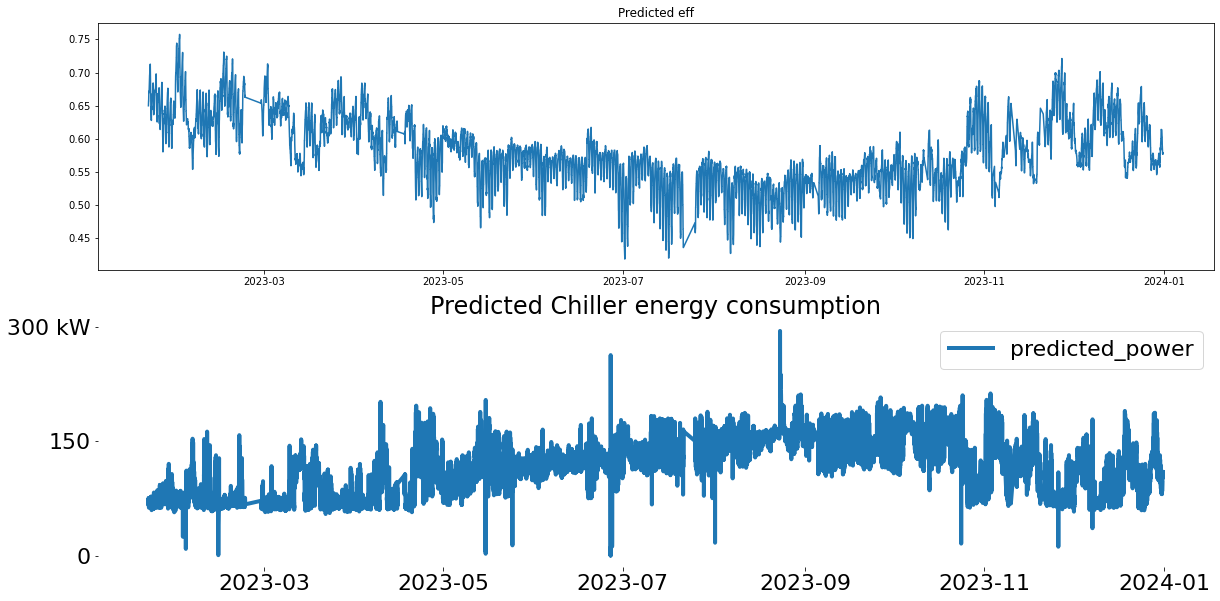

In [41]:
# Read dataframe
df_climate = calculate_wetbulb(df_climate)

ch2 = df_power[['datetime', 'SDH.SW.MSA.CH-2.PWR REAL 3 P']]

onicon_df = pd.read_csv("./ls_ctr/onicon.csv")
onicon_df['datetime'] = pd.to_datetime(onicon_df['datetime'])
onicon_df['datetime'] = onicon_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)

# Merge
onicon_df = pd.merge(pd.merge(ch2, df_climate, on='datetime', how='inner'), onicon_df, on='datetime', how="inner")

# Clean
onicon_df.rename(columns={'SDH.SW.MSA.CH-2.PWR REAL 3 P': 'power'}, inplace=True)
onicon_df.dropna(inplace=True)

# Train dataframe

onicon_train = onicon_df[onicon_df['power'] > 10]
onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']

print('Avg eff (kW/ton):', onicon_train['eff'].mean())

# build linear models for eff based on outside temperature
# Reshape x to be a 2D array
X = onicon_train[['wb_temp', 'air_temp', 'rh_out']]
y = onicon_train['eff'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'Root mean Squared Error: {rmse}')

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

# make prediction on the entire dataset based on measured weather
eff_pred = model.predict(onicon_df[['wb_temp', 'air_temp', 'rh_out']])
onicon_df["predicted_eff"] = eff_pred

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[20, 10])
ax1.plot(onicon_df['datetime'], onicon_df["predicted_eff"])
ax1.set_title("Predicted eff")

onicon_df["predicted_power"] = onicon_df['thermal'] * onicon_df["predicted_eff"]
utils_plot.make_plot(df=onicon_df, 
                     axe=ax2,
                     columns=["predicted_power"], 
                     plot_title="Predicted Chiller energy consumption", 
                     yrange=[0, 300, 150], 
                     unit=" kW", 
                     legend=['predicted_power'],
                     figsize=(20, 8))

onicon_test = onicon_df[onicon_df['power'] > 10]
onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_power']
kw_rmse = np.sqrt(np.mean((onicon_test['power'] - onicon_test['predicted_power']) ** 2))
print('RMSE for power consumption:', kw_rmse)

Load shift analysis based on moer signal

No handles with labels found to put in legend.
No handles with labels found to put in legend.


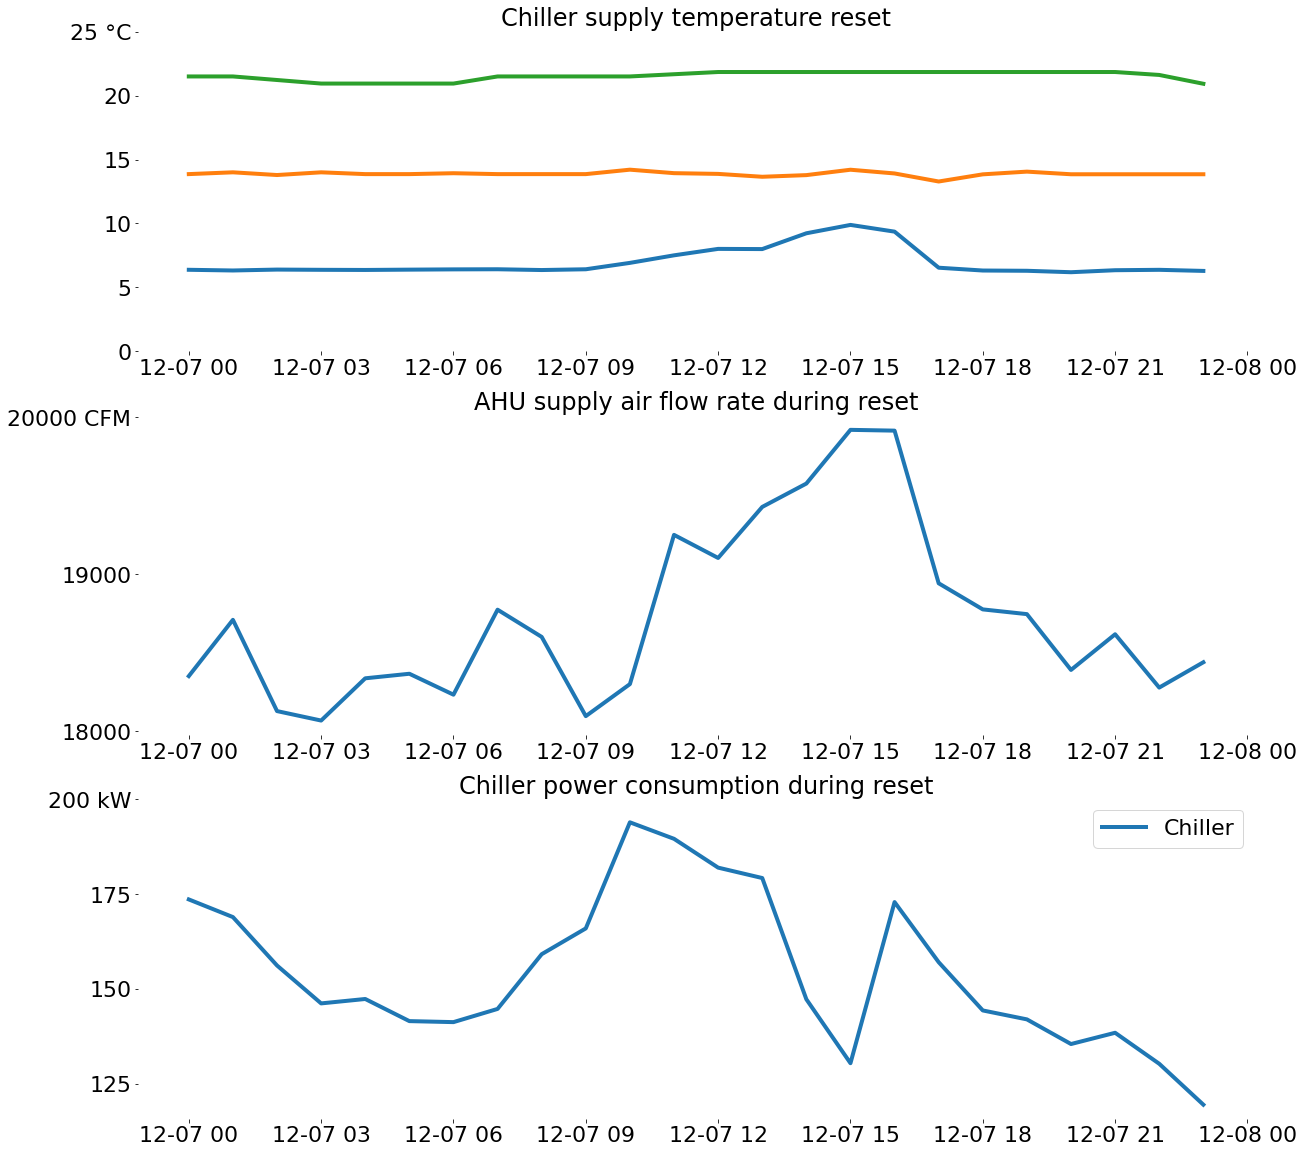

In [42]:
# load setpoint reset data
reset_df = pd.read_csv("./ls_ctr/spt_reset.csv")
reset_df['datetime'] = pd.to_datetime(reset_df['datetime']).dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
reset_df.set_index('datetime', inplace=True)
reset_df = reset_df.resample('1H').mean()
reset_df.reset_index(inplace=True)
reset_df = f2c(reset_df, ['ch_swt', 'ahu_sat', 'ahu_rat'])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[20, 20])

utils_plot.make_plot(df=reset_df, 
                     columns=['ch_swt', 'ahu_sat', 'ahu_rat'], 
                     axe=ax1,
                     unit=" °C", 
                     plot_title="Chiller supply temperature reset", 
                     legend=['Chiller supply water temp', 'AHU supply air temp', 'AHU return air temp'],
                     yrange=[0, 25, 5], 
                     figsize=(18, 6))
utils_plot.make_plot(df=reset_df, 
                     axe=ax2,
                     columns=['ahu_cfm'], 
                     unit=" CFM", 
                     plot_title="AHU supply air flow rate during reset", 
                     legend=['AHU supply airflow'], 
                     yrange=[18000, 20000, 1000], 
                     figsize=(18, 4))
utils_plot.make_plot(df=reset_df, 
                     axe=ax3,
                     columns=['ch_kw'], 
                     unit=" kW", 
                     plot_title="Chiller power consumption during reset", 
                     yrange=[125, 200, 25], 
                     legend=['Chiller'], 
                     figsize=(18, 4))

In [43]:
# Create a complete time range for comparison
start_date = onicon_df['datetime'].min()
end_date = onicon_df['datetime'].max()
full_range = pd.date_range(start=start_date, end=end_date, freq='15 min')
full_df = pd.DataFrame(full_range, columns=['datetime'])

# Merge the complete range with the existing DataFrame
df_ls = full_df.merge(onicon_df, on='datetime', how='left')

# Identify days with any data and days with complete data missing
df_ls['date'] = df_ls['datetime'].dt.date  # separate date for grouping
day_data_count = df_ls.groupby('date')['predicted_power'].count()
missing_days = day_data_count[day_data_count <= 4 * 15].index  # days with all data missing
print("Missing days in the dataframe:", missing_days)

# # Drop days with all data missing
df_ls = df_ls[~df_ls['date'].isin(missing_days)]
# df_ls.dropna(inplace=True)

# Linear interpolation for missing values within days that have some data
df_ls['predicted_power'] = df_ls.groupby('date')['predicted_power'].apply(lambda group: group.interpolate(method='linear'))

# Combine datafram
df_ls = pd.merge(df_ls, df_moer, on='datetime', how='inner')
df_ls['emissions'] = df_ls['predicted_power'] * df_ls['moer'] / 1000
df_ls = df_ls[['datetime', 'predicted_power', 'moer', 'emissions']]

Missing days in the dataframe: Index([2023-01-20, 2023-02-22, 2023-02-23, 2023-02-24, 2023-02-25, 2023-02-26,
       2023-02-27, 2023-04-15, 2023-04-16, 2023-04-17, 2023-07-21, 2023-07-22,
       2023-07-23, 2023-07-24, 2023-07-25, 2023-09-04, 2023-09-05, 2023-10-11,
       2023-10-12, 2023-11-04, 2023-11-05, 2023-11-08, 2023-11-10, 2023-11-11,
       2023-11-12, 2023-11-15, 2023-11-16, 2023-11-18, 2023-11-19, 2023-11-20,
       2023-11-21],
      dtype='object', name='date')


Annual analysis on load shift

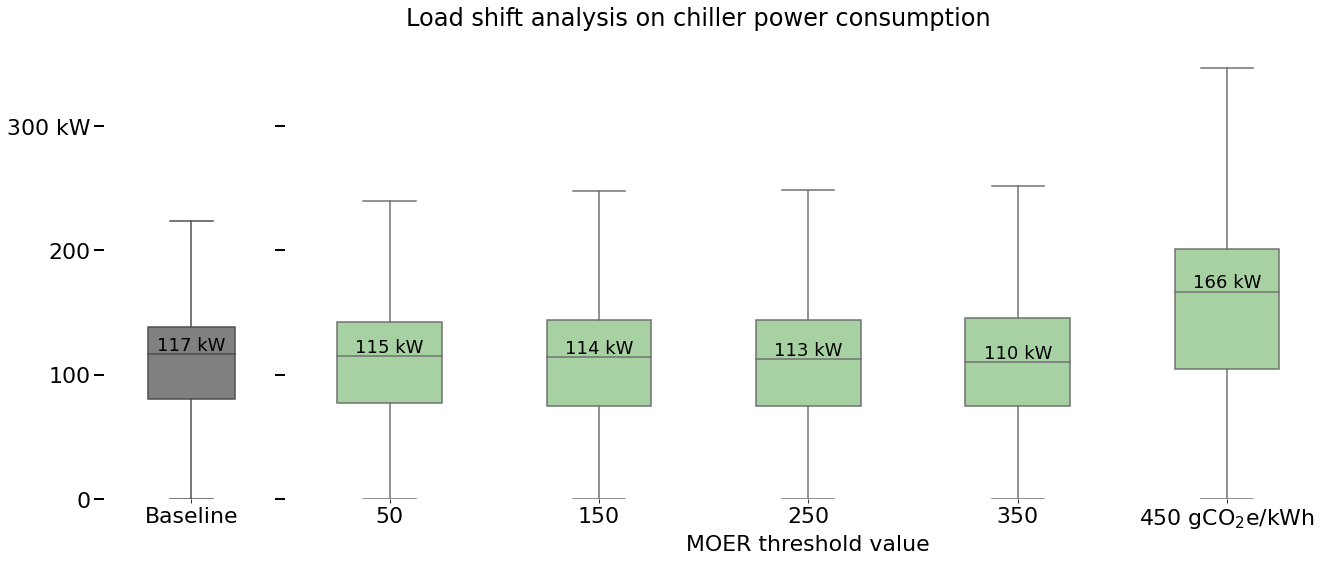

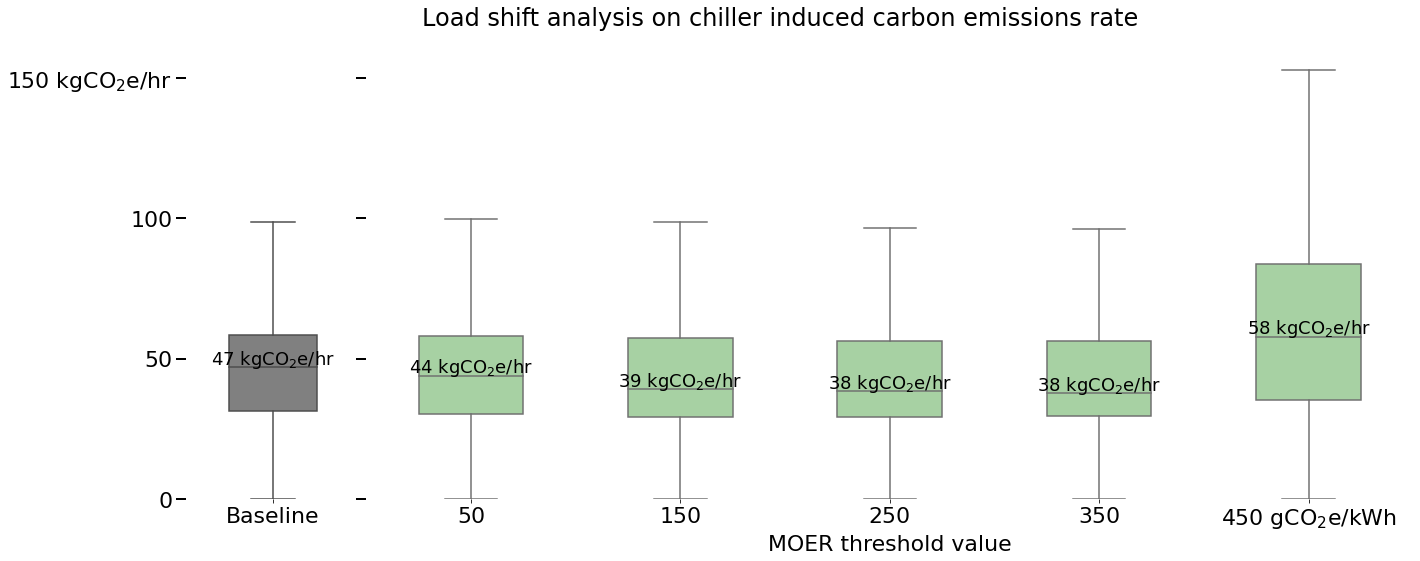

In [44]:
# Define parameters
A_m2 = 13000
A_sf2 = 139931
threshold_shades = ['#a1d99b', '#a1d99b', '#a1d99b', '#a1d99b', '#a1d99b']

# Chiller 30% setpoint reset
df_power_shift = pd.DataFrame()
df_emissions_shift = pd.DataFrame()

df_base = df_ls
df_base['Baseline'] = df_base['predicted_power']
# df_base = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 6)]
for threshold in range(50, 500, 100):
    potential_power, potential_emissions, deposit_list, activation = utils_shift.shift(threshold, df_base)
    df_power_shift['{} g/kWh'.format(threshold)] = potential_power
    df_emissions_shift['{} g/kWh'.format(threshold)] = potential_emissions

df_power_shift.columns = ['50', '150', '250', '350', '450 gCO$_2$e/kWh']
df_emissions_shift.columns = ['50', '150', '250', '350', '450 gCO$_2$e/kWh']

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=df_base, 
                           columns=['Baseline'], 
                           unit=' kW', 
                           axe=axs[0], 
                           color=['grey'],
                           hide_xticks=False, 
                           yrange=[0, 350, 100])

utils_plot.create_box_plot(df=df_power_shift, 
                           columns=df_power_shift.columns, 
                           unit=' kW', 
                           axe=axs[1], 
                           hide_xticks=False, 
                           color=threshold_shades,
                           xlabel='MOER threshold value', 
                           yrange=[0, 350, 100])

fig.suptitle('Load shift analysis on chiller power consumption', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

df_base['Baseline'] = df_base['emissions']
fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=df_base, 
                           columns=['Baseline'], 
                           unit=' kgCO$_2$e/hr', 
                           axe=axs[0], 
                           color=['grey'],
                           hide_xticks=False, 
                           yrange=[0, 155, 50])

utils_plot.create_box_plot(df=df_emissions_shift, 
                           columns=df_power_shift.columns, 
                           unit=' kgCO$_2$e/hr', 
                           axe=axs[1], 
                           hide_xticks=False, 
                           color=threshold_shades, 
                           xlabel='MOER threshold value', 
                           yrange=[0, 155, 50])

fig.suptitle('Load shift analysis on chiller induced carbon emissions rate', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

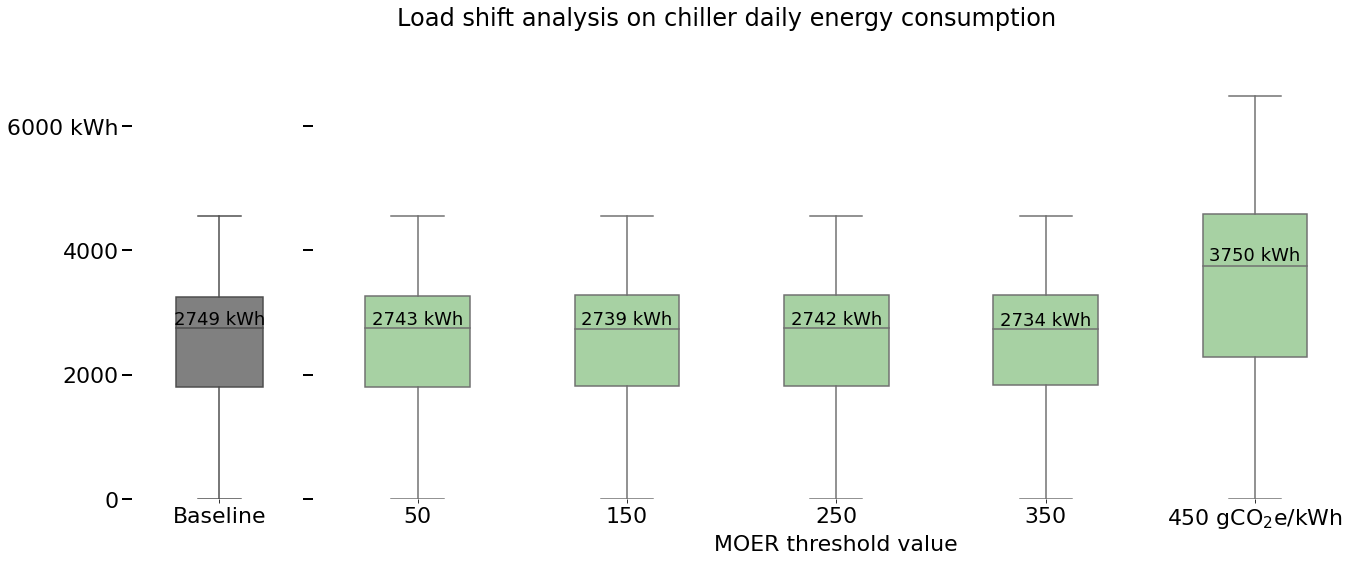

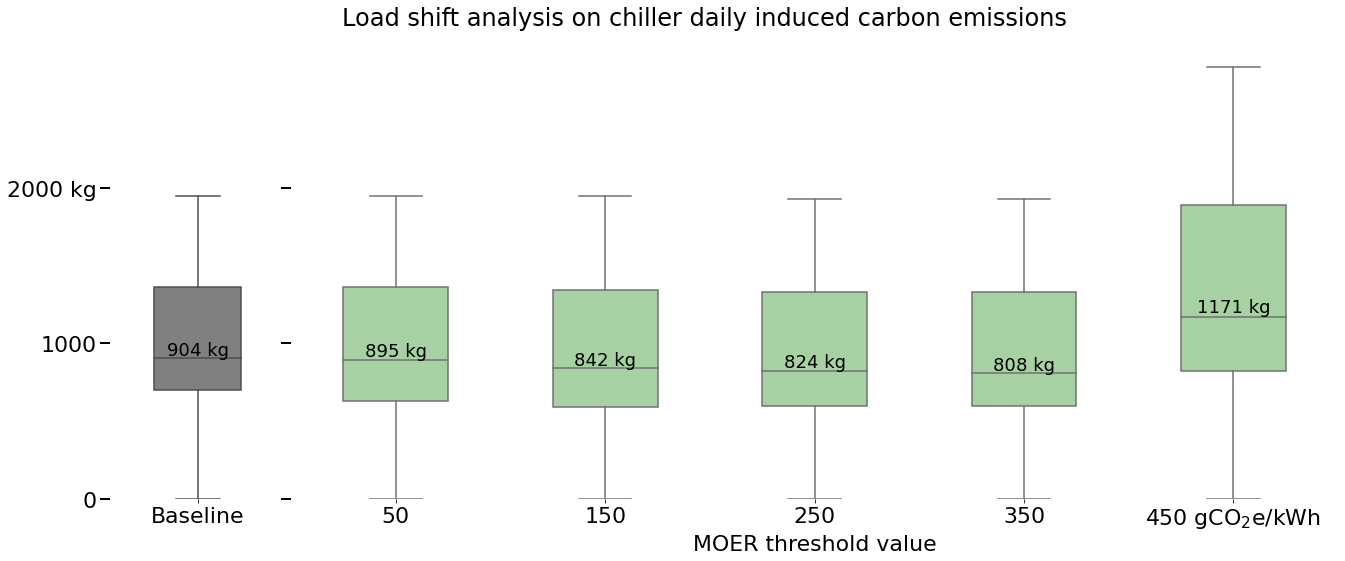

In [45]:
daily_sum = df_base.set_index('datetime')
daily_sum = daily_sum[['predicted_power', 'emissions']].resample('D').sum() * 0.25
daily_sum.reset_index(inplace=True)
daily_sum['Baseline'] = daily_sum['predicted_power']

df_power_shift['datetime'] = df_base['datetime']
daily_power_shift = df_power_shift.set_index('datetime')
daily_power_shift = daily_power_shift.resample('D').sum() * 0.25
daily_power_shift.reset_index(inplace=True)
df_power_shift.reset_index(drop=True, inplace=True)

df_emissions_shift['datetime'] = df_base['datetime']
daily_emissions_shift = df_emissions_shift.set_index('datetime')
daily_emissions_shift = daily_emissions_shift.resample('D').sum() * 0.25
daily_emissions_shift.reset_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=daily_sum, 
                           columns=['Baseline'], 
                           unit=' kWh', 
                           axe=axs[0], 
                           yrange=[0, 7000, 2000], 
                           color=['grey'],
                           hide_xticks=False)
utils_plot.create_box_plot(df=daily_power_shift, 
                           columns=daily_power_shift.columns[1:], 
                           unit=' kWh', 
                           axe=axs[1], 
                           yrange=[0, 7000, 2000], 
                           color=threshold_shades, 
                           hide_xticks=False, 
                           xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily energy consumption', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

daily_sum['Baseline'] = daily_sum['emissions']
fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=daily_sum, 
                           columns=['Baseline'], 
                           unit=' kg', 
                           axe=axs[0], 
                           color=['grey'], 
                           yrange=[0, 2800, 1000], 
                           hide_xticks=False)

utils_plot.create_box_plot(df=daily_emissions_shift, 
                           columns=daily_emissions_shift.columns[1:], 
                           unit=' kg', 
                           axe=axs[1], 
                           yrange=[0, 2800, 1000], 
                           color=threshold_shades, 
                           hide_xticks=False, 
                           xlabel='MOER threshold value')

fig.suptitle('Load shift analysis on chiller daily induced carbon emissions', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

Demonstration on the load shift strategy

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
No handles with labels found to put in legend.
/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


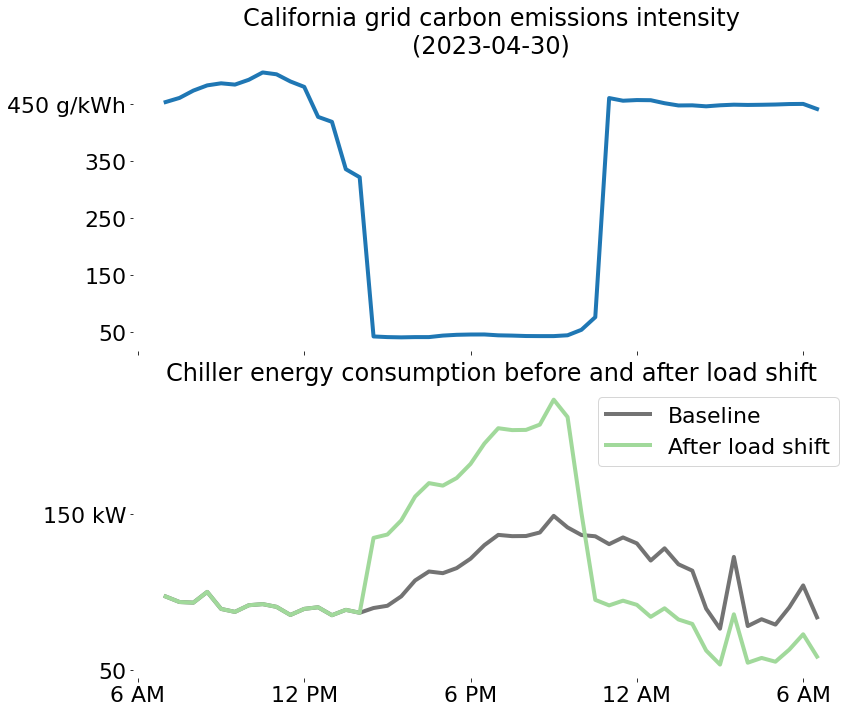

In [46]:
# date = '2023-04-30'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = [12, 10], sharex=True)

date = '2023-04-30'
df_moer['value'] = df_moer['value']
df_moer_hourly = df_moer.set_index('datetime')
df_moer_hourly = df_moer_hourly.resample('0.5H').mean()
df_moer_hourly.reset_index(inplace=True)
utils_plot.make_plot(df=df_moer_hourly, 
                     axe=ax1,
                     columns=['moer'], 
                     date=date, 
                     unit=' g/kWh', 
                     legend=['MOER'], 
                     plot_title='California grid carbon emissions intensity\n(2023-04-30)',
                     yrange=[50, 500, 100],
                     figsize=(15, 6))

df_merge = pd.merge(df_base, df_power_shift, on='datetime', how='inner')
df_merge = df_merge.set_index('datetime')
df_merge = df_merge.resample('0.5H').mean()
df_merge.reset_index(inplace=True)
utils_plot.make_plot(df=df_merge, 
                     axe=ax2,
                     columns=['predicted_power', '50'], 
                     date=date, 
                     unit=' kW', 
                     legend=['Baseline', 'After load shift'],
                     color=["#737373", "#a1d99b"],
                     plot_title='Chiller energy consumption before and after load shift',
                     yrange=[50, 200, 100], 
                     figsize=(15, 6))

plt.tight_layout()

plt.show()

Annual summary

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/3531724462.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_energy = daily_power_shift.sum() / A_m2


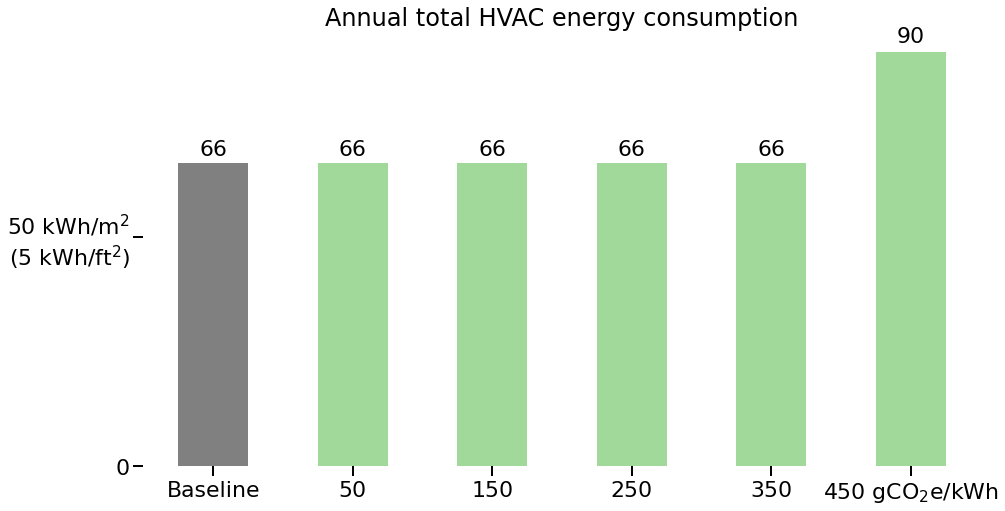

In [47]:
base_energy = daily_sum['predicted_power'].sum() / A_m2
total_energy = daily_power_shift.sum() / A_m2
total_energy['Baseline'] = base_energy
total_energy = total_energy.reindex(['Baseline', '50', '150', '250', '350', '450 gCO$_2$e/kWh'])
total_energy = pd.DataFrame(total_energy)
total_energy.reset_index(inplace=True)
total_energy.columns = ['index', 'kWh_m2']
total_energy['kWh_ft2'] = total_energy['kWh_m2'] * 0.092903
total_energy.set_index('index', inplace=True)
utils_plot.create_bar_plot(df=total_energy, 
                           columns='kWh_m2', 
                           unit=" kWh/m$^2$", 
                           plot_title="Annual total HVAC energy consumption", 
                           yrange=[0, 100, 50], 
                           annotation=True, 
                           dual_unit=' kWh/ft$^2$', 
                           color=['grey'] + threshold_shades,
                           figsize=(15, 8),
                           conversion_factor=0.092903)

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/2452044051.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_emissions = daily_emissions_shift.sum() / A_m2


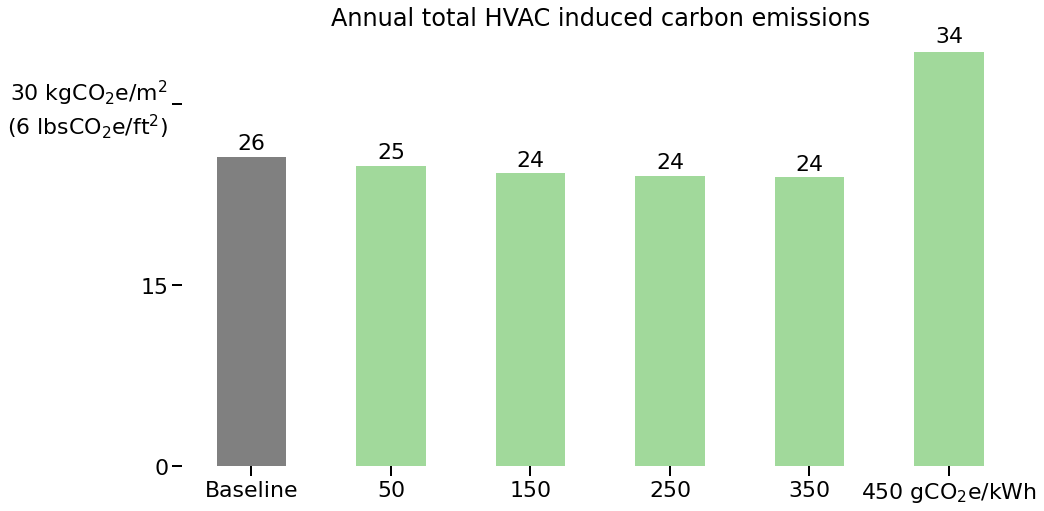

In [48]:
base_emissions = daily_sum['emissions'].sum() / A_m2
total_emissions = daily_emissions_shift.sum() / A_m2
total_emissions['Baseline'] = base_emissions
total_emissions = total_emissions.reindex(['Baseline', '50', '150', '250', '350', '450 gCO$_2$e/kWh'])
total_emissions = pd.DataFrame(total_emissions)
total_emissions.reset_index(inplace=True)
total_emissions.columns = ['index', 'kg_m2']
total_emissions['lbs_ft2'] = total_emissions['kg_m2'] * 0.204816
total_emissions.set_index('index', inplace=True)
utils_plot.create_bar_plot(df=total_emissions, 
                           columns='kg_m2', 
                           unit=" kgCO$_2$e/m$^2$", 
                           plot_title="Annual total HVAC induced carbon emissions", 
                           yrange=[0, 40, 15], 
                           annotation=True, 
                           dual_unit=' lbsCO$_2$e/ft$^2$', 
                           color=['grey'] + threshold_shades, 
                           figsize=(15, 8), 
                           conversion_factor=0.2048)

Export for summary

In [49]:
daily_other_power = df_power.set_index('datetime')
daily_other_power = daily_other_power.resample('D').sum() * 0.25
daily_other_power = pd.merge(daily_other_power, daily_sum, on='datetime', how='inner')
daily_other_power.to_csv("daily_breakdown.csv")

Moving average comparison (for demand charge)

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/4286784328.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/4286784328.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/4286784328.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

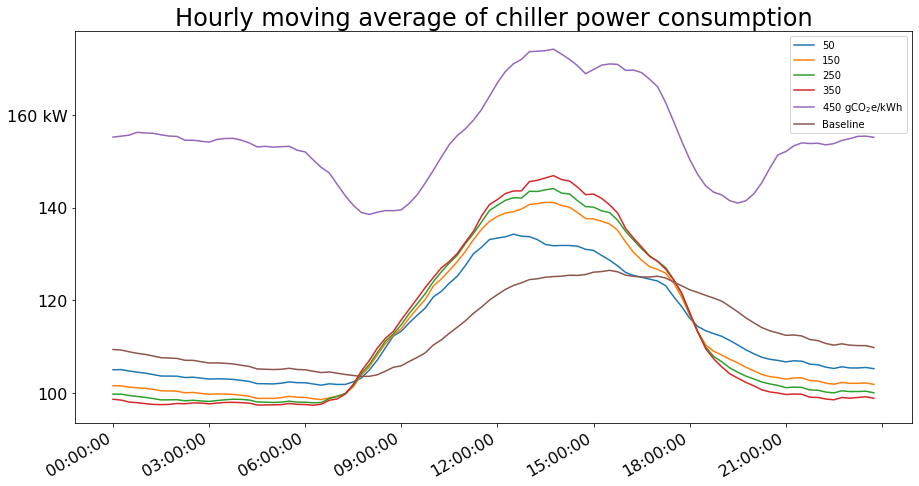

In [50]:
df_ls['MA_power'] = df_ls['predicted_power'].rolling(window=4, min_periods=1).mean()

plt.figure(figsize=[15, 8])

for threshold in df_power_shift.columns[:-1]:
    df_ls['MA_potential_power'] = df_power_shift[threshold].rolling(window=4, min_periods=1).mean()
    df_MA = df_ls[['datetime', 'MA_power', 'MA_potential_power']]
    df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
    df_MA = df_MA.groupby('datetime').mean()
    df_MA.reset_index(inplace=True)
    plt.plot(df_MA['datetime'], df_MA['MA_potential_power'], label = threshold)

plt.plot(df_MA['datetime'], df_MA['MA_power'], label = "Baseline")

# Format date ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12))  # Show a date tick every 12 hours
plt.gcf().autofmt_xdate()  # Rotate the dates for better legibility
unit = ' kW'
new_ticks = np.arange(100, 180, 20)  # Adjust the step value as needed
plt.gca().set_yticks(new_ticks)
y_ticks = plt.gca().get_yticks()  # Get the current y-tick values
plt.gca().set_yticklabels([f'{round(y)}{unit}' for y in y_ticks])

tick_labels = [f"{int(tick)}" for tick in new_ticks[:-1]] + [f"{int(new_ticks[-1])}{unit}"]
plt.gca().set_yticklabels(tick_labels)
plt.gca().tick_params(axis='both', labelsize=16)

plt.title("Hourly moving average of chiller power consumption", fontsize = 24)
plt.legend()

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/3147126075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)


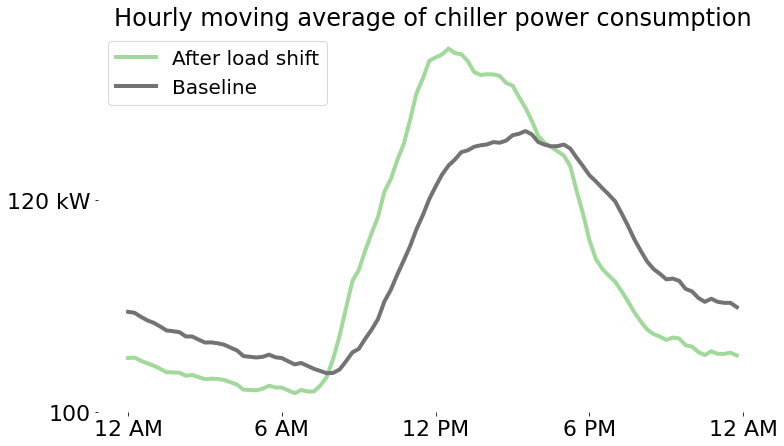

In [51]:
df_ls['MA_power'] = df_ls['predicted_power'].rolling(window=4, min_periods=1).mean()

threshold = 50
df_ls['MA_potential_power'] = df_power_shift[str(threshold)].rolling(window=4, min_periods=1).mean()
df_MA = df_ls[['datetime', 'MA_power', 'MA_potential_power']]
df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
df_MA = df_MA.groupby('datetime').mean()
df_MA.reset_index(inplace=True)
df_MA['datetime'] = pd.to_datetime(df_MA['datetime'])

# Comparison
plt.figure(figsize=[12, 7])
plt.plot(df_MA['datetime'], df_MA['MA_potential_power'], label = "After load shift", lw = 4, color = "#a1d99b")
plt.plot(df_MA['datetime'], df_MA['MA_power'], label = "Baseline", lw = 4, color = "#737373")

# Format date ticks
# Set major locator to 6 hours and use a DateFormatter for the x-axis
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-I %p'))  # '%I %p' for 12-hour clock format with AM/PM

unit = ' kW'
new_ticks = np.arange(100, 140, 20)  # Adjust the step value as needed
plt.gca().set_yticks(new_ticks)
y_ticks = plt.gca().get_yticks()  # Get the current y-tick values
plt.gca().set_yticklabels([f'{round(y)}{unit}' for y in y_ticks])

tick_labels = [f"{int(tick)}" for tick in new_ticks[:-1]] + [f"{int(new_ticks[-1])}{unit}"]
plt.gca().set_yticklabels(tick_labels)
plt.gca().tick_params(axis='both', labelsize=22)

plt.title("Hourly moving average of chiller power consumption", fontsize = 24)
plt.legend(fontsize=20, loc='upper left')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

Time window analysis on load shift

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/2965757417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['Baseline'] = df_base['predicted_power']


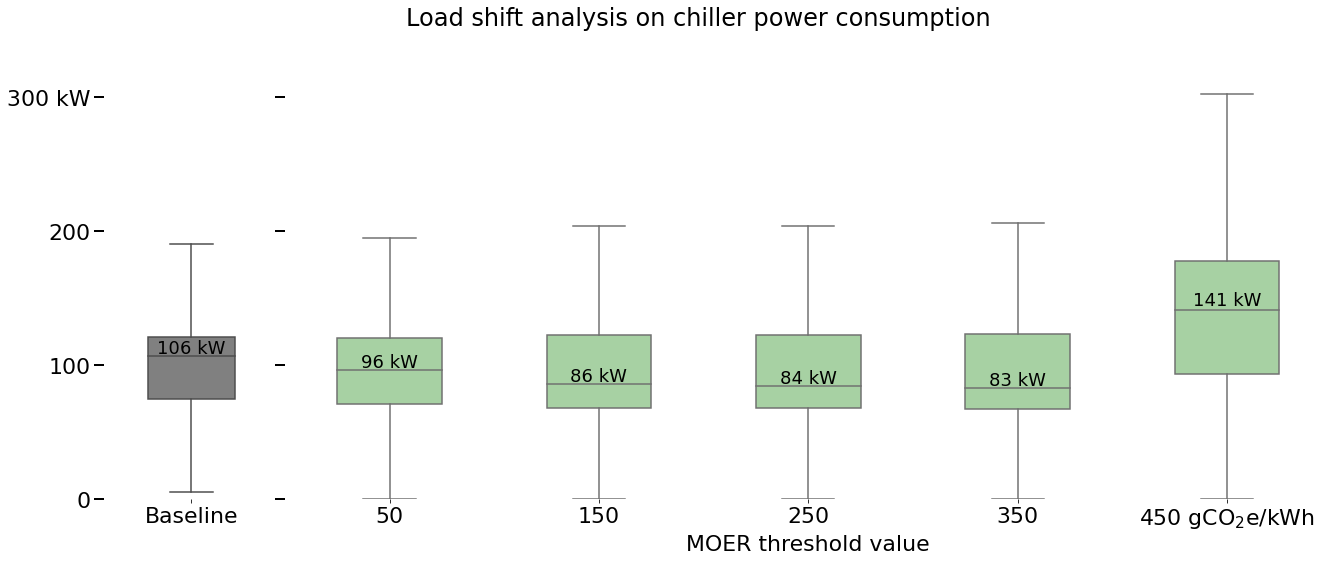

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/2965757417.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['Baseline'] = df_base['emissions']


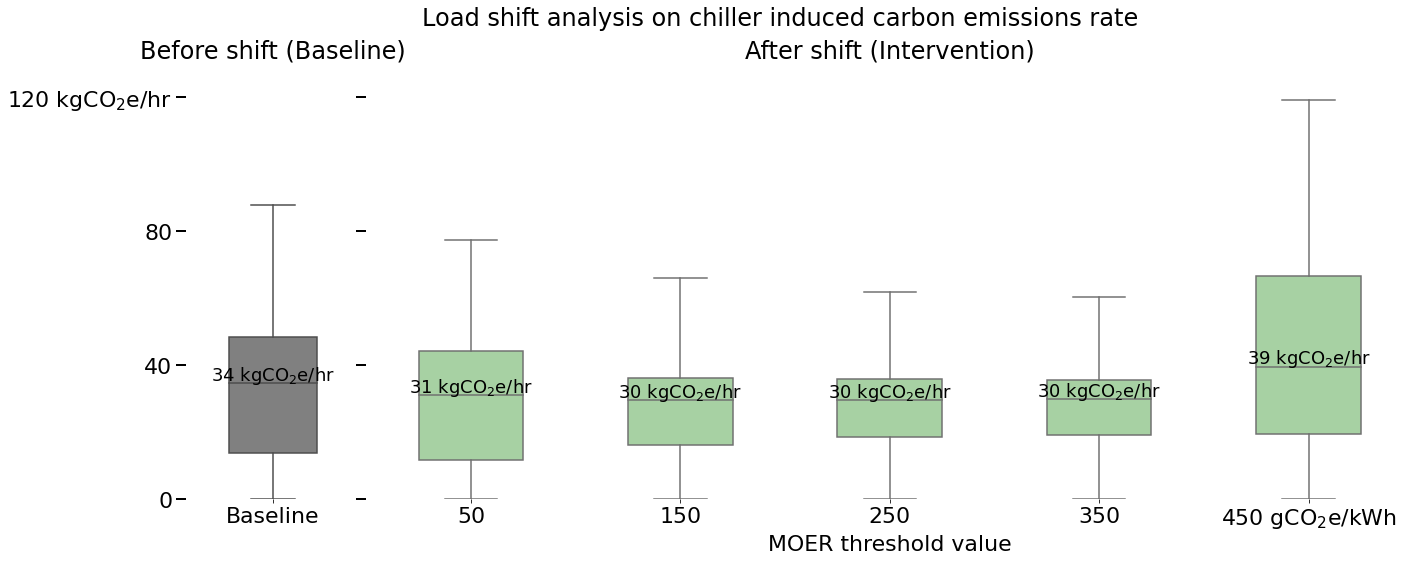

In [52]:
# Chiller 30% setpoint reset
df_power_shift = pd.DataFrame()
df_emissions_shift = pd.DataFrame()

# df_base = df_ls
df_base = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 6)]
df_base.reset_index(inplace=True)
df_base.drop(columns=['index'], inplace=True)
df_base['Baseline'] = df_base['predicted_power']

for threshold in range(50, 500, 100):
    potential_power, potential_emissions, deposit_list, activation = utils_shift.shift(threshold, df_base)
    df_power_shift['{} g/kWh'.format(threshold)] = potential_power
    df_emissions_shift['{} g/kWh'.format(threshold)] = potential_emissions

df_power_shift.columns = ['50', '150', '250', '350', '450 gCO$_2$e/kWh']
df_emissions_shift.columns = ['50', '150', '250', '350', '450 gCO$_2$e/kWh']

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})

utils_plot.create_box_plot(df=df_base, 
                           columns=['Baseline'], 
                           unit=' kW', 
                           axe=axs[0], 
                           hide_xticks=False, 
                           color=['grey'], 
                           yrange=[0, 325, 100])

utils_plot.create_box_plot(df=df_power_shift, 
                           columns=df_power_shift.columns, 
                           unit=' kW', 
                           axe=axs[1], 
                           hide_xticks=False, 
                           xlabel='MOER threshold value', 
                           color=threshold_shades, 
                           yrange=[0, 325, 100])

fig.suptitle('Load shift analysis on chiller power consumption', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

df_base['Baseline'] = df_base['emissions']
fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=df_base, 
                           columns=['Baseline'],
                           unit=' kgCO$_2$e/hr', 
                           axe=axs[0], 
                           plot_title='Before shift (Baseline)', 
                           hide_xticks=False, 
                           color=['grey'], 
                           yrange=[0, 130, 40])
utils_plot.create_box_plot(df=df_emissions_shift, 
                           columns=df_power_shift.columns, 
                           unit=' kgCO$_2$e/hr',
                           axe=axs[1], 
                           plot_title='After shift (Intervention)', 
                           hide_xticks=False, 
                           color=threshold_shades, 
                           xlabel='MOER threshold value', 
                           yrange=[0, 130, 40])
fig.suptitle('Load shift analysis on chiller induced carbon emissions rate', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

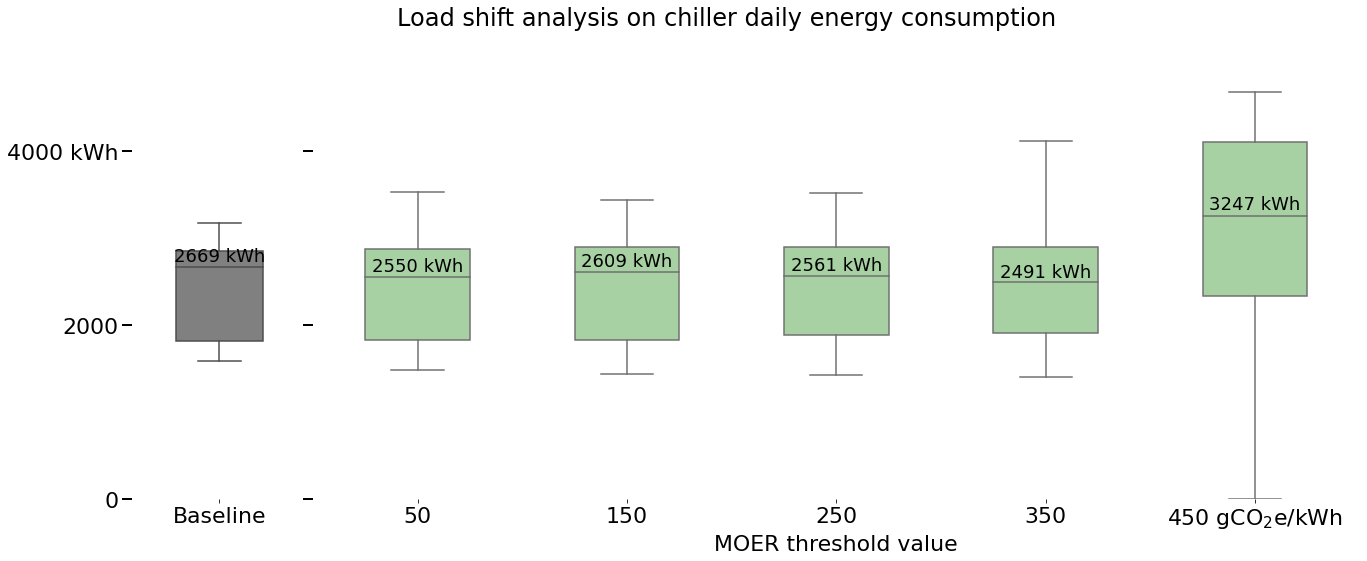

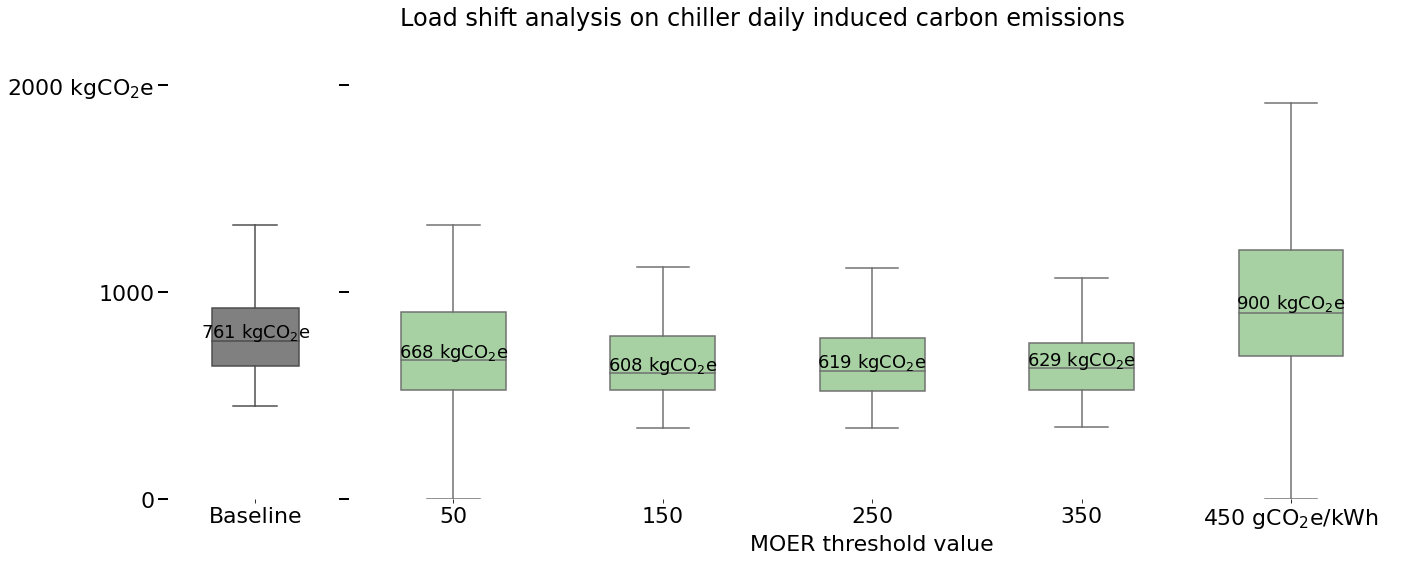

In [53]:
daily_sum = df_base.set_index('datetime')
daily_sum = daily_sum[['predicted_power', 'emissions']].resample('D').sum() * 0.25
daily_sum.reset_index(inplace=True)
daily_sum['Baseline'] = daily_sum['predicted_power']

df_power_shift['datetime'] = df_base['datetime']
daily_power_shift = df_power_shift.set_index('datetime')
daily_power_shift = daily_power_shift.resample('D').sum() * 0.25
daily_power_shift.reset_index(inplace=True)

df_emissions_shift['datetime'] = df_base['datetime']
daily_emissions_shift = df_emissions_shift.set_index('datetime')
daily_emissions_shift = daily_emissions_shift.resample('D').sum() * 0.25
daily_emissions_shift.reset_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=daily_sum, 
                           columns=['Baseline'], 
                           unit=' kWh', 
                           axe=axs[0], 
                           color=['grey'], 
                           yrange=[0, 5000, 2000], 
                           hide_xticks=False)
utils_plot.create_box_plot(df=daily_power_shift, 
                           columns=daily_power_shift.columns[1:], 
                           unit=' kWh', 
                           axe=axs[1], 
                           yrange=[0, 5000, 2000], 
                           color=threshold_shades, 
                           hide_xticks=False, 
                           xlabel='MOER threshold value')

fig.suptitle('Load shift analysis on chiller daily energy consumption', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

daily_sum['Baseline'] = daily_sum['emissions']
fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_box_plot(df=daily_sum, 
                           columns=['Baseline'], 
                           unit=' kgCO$_2$e', 
                           axe=axs[0], 
                           color=['grey'], 
                           yrange=[0, 2100, 1000], 
                           hide_xticks=False)
utils_plot.create_box_plot(df=daily_emissions_shift, 
                           columns=daily_emissions_shift.columns[1:], 
                           unit=' kgCO$_2$e', 
                           axe=axs[1], 
                           yrange=[0, 2100, 1000], 
                           color=threshold_shades, 
                           hide_xticks=False, 
                           xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily induced carbon emissions', fontsize=24)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

Seasonal summary

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/3173240229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_energy = daily_power_shift.sum() / 1000


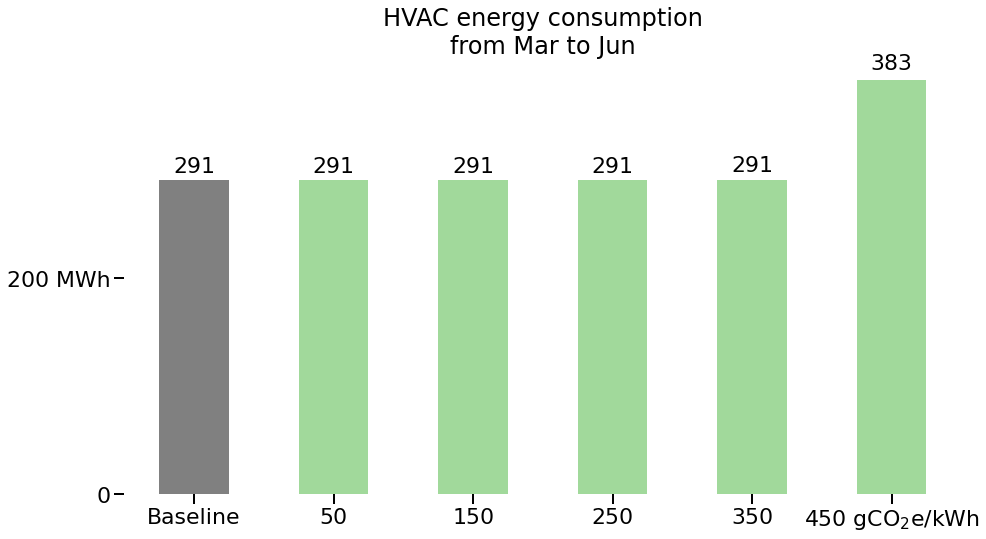

In [54]:
base_energy = daily_sum['predicted_power'].sum() / 1000
total_energy = daily_power_shift.sum() / 1000
total_energy['Baseline'] = base_energy
total_energy = total_energy.reindex(['Baseline', '50', '150', '250', '350', '450 gCO$_2$e/kWh'])
total_energy = pd.DataFrame(total_energy)
total_energy.reset_index(inplace=True)
total_energy.columns = ['index', 'MWh']
total_energy.set_index('index', inplace=True)
utils_plot.create_bar_plot(df=total_energy, 
                           columns='MWh', 
                           unit=" MWh", 
                           plot_title="HVAC energy consumption\nfrom Mar to Jun", 
                           yrange=[0, 400, 200], 
                           figsize=(15, 8), 
                           color=['grey'] + threshold_shades,
                           annotation=True)

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_81393/2883902662.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_emissions = daily_emissions_shift.sum() / 1000


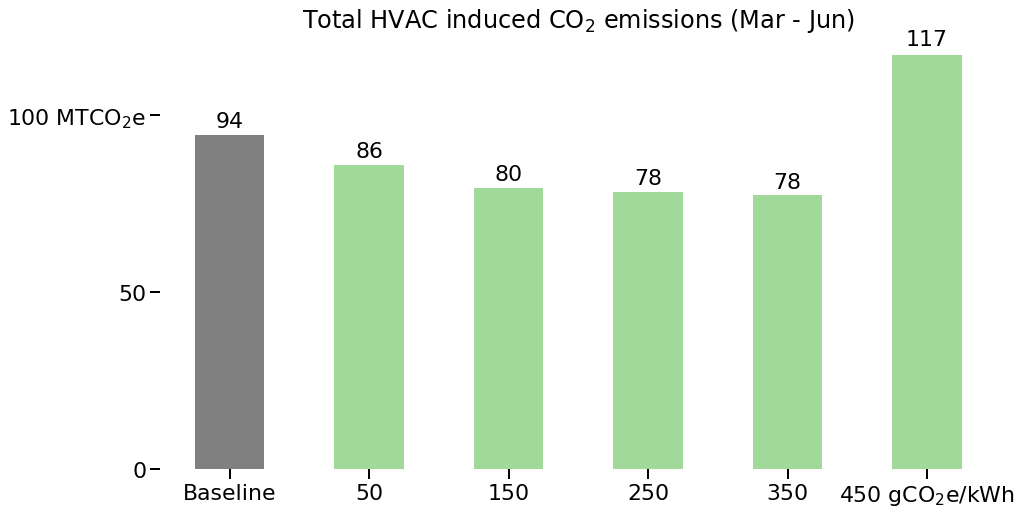

In [55]:
base_emissions = daily_sum['emissions'].sum() / 1000
total_emissions = daily_emissions_shift.sum() / 1000
total_emissions['Baseline'] = base_emissions
total_emissions = total_emissions.reindex(['Baseline', '50', '150', '250', '350', '450 gCO$_2$e/kWh'])
total_emissions = pd.DataFrame(total_emissions)
total_emissions.reset_index(inplace=True)
total_emissions.columns = ['index', 'ton']

total_emissions.set_index('index', inplace=True)
utils_plot.create_bar_plot(df=total_emissions, 
                           columns='ton', 
                           unit=" MTCO$_2$e", 
                           plot_title="Total HVAC induced CO$_2$ emissions (Mar - Jun)", 
                           yrange=[0, 110, 50], 
                           annotation=True, 
                           figsize=(15, 8),
                           color=['grey'] + threshold_shades)